# CS6140: Machine Learning Fall 2024

## Exploratory Data Analysis (EDA)

You are a data scientist at an analytics firm specializing in real estate and
tourism. Your team is tasked with analyzing Airbnb data to provide insights
that will help optimize property listings and improve guest satisfaction. Your
task is to focus on Airbnb Listings dataset and the Reviews dataset (and the
data dictionary). 

### Preprocessing Data

#### Step 1: Installing the required libraries

We would be needing textblob (for sentiment analysis) and wordcloud (for identifying the mostly used words in the positive and the negative reviews). We use the python package installer (pip) in-order to install these packages

In [6]:
!pip install textblob

In [7]:
!pip install wordcloud

#### Step 2: Importing all the required modules

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from textblob import TextBlob
from wordcloud import WordCloud


# ignore all the warnings
warnings.filterwarnings('ignore')

#### Step 4: Loading the listing dataset and having some basic understanding of the dataset

In [11]:
city = 'boston'
listings = pd.read_csv(f'data/{city}/listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20240622024514,2024-06-22,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,...,4.96,4.84,4.88,NaN,f,1,1,0,0,0.23
1,5506,https://www.airbnb.com/rooms/5506,20240622024514,2024-06-22,city scrape,** Fort Hill Inn Private! Minutes to center!**,"Private guest room with private bath, You do n...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/miso/Hosting-...,8229,...,4.89,4.56,4.75,STR-490093,f,10,10,0,0,0.66
2,6695,https://www.airbnb.com/rooms/6695,20240622024514,2024-06-22,city scrape,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex","Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,...,4.95,4.52,4.72,STR-491702,f,10,10,0,0,0.71
3,8789,https://www.airbnb.com/rooms/8789,20240622024514,2024-06-22,city scrape,Curved Glass Studio/1bd facing Park,This unit is for sale. There will need to be o...,Beacon Hill is a historic neighborhood filled ...,https://a0.muscache.com/pictures/miso/Hosting-...,26988,...,4.97,4.97,4.59,NaN,f,8,8,0,0,0.24
4,10811,https://www.airbnb.com/rooms/10811,20240622024514,2024-06-22,city scrape,"Back Bay Apt Studio-3 blocks to Pru center & ""T""",Stunning Back Bay furnished studio apartment. ...,A one-square mile neighborhood that is arguabl...,https://a0.muscache.com/pictures/45735/27548f7...,38997,...,4.00,5.00,4.67,NaN,f,13,13,0,0,0.09


#### Step 5: Filtering out the required fields from the dataset

In [13]:
required_columns = ['id', 'host_response_rate', 'host_is_superhost', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'availability_365', 'review_scores_rating', 'instant_bookable', 'reviews_per_month', 'number_of_reviews', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

In [14]:
listings = listings.loc[:, required_columns]

In [15]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            4325 non-null   int64  
 1   host_response_rate            3823 non-null   object 
 2   host_is_superhost             4125 non-null   object 
 3   neighbourhood_cleansed        4325 non-null   object 
 4   neighbourhood_group_cleansed  0 non-null      float64
 5   latitude                      4325 non-null   float64
 6   longitude                     4325 non-null   float64
 7   property_type                 4325 non-null   object 
 8   room_type                     4325 non-null   object 
 9   amenities                     4325 non-null   object 
 10  price                         3543 non-null   object 
 11  minimum_nights                4325 non-null   int64  
 12  maximum_nights                4325 non-null   int64  
 13  ava

In [16]:
listings.describe()

,id,neighbourhood_group_cleansed,latitude,longitude,minimum_nights,maximum_nights,availability_365,review_scores_rating,reviews_per_month,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,4.325000e+03,0.0,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,3326.000000,3326.000000,4325.000000,3317.000000,3318.000000,3316.000000,3318.000000,3316.000000,3316.000000
mean,4.680574e+17,NaN,42.336802,-71.083199,27.796763,597.905896,191.822197,4.713536,1.744110,45.946127,4.763639,4.734970,4.828019,4.822303,4.755093,4.589364
std,4.712458e+17,NaN,0.027019,0.032331,36.266386,431.509974,125.982783,0.442439,1.970345,91.367216,0.400165,0.425956,0.409563,0.403304,0.378300,0.486123
min,3.781000e+03,NaN,42.235300,-71.174020,1.000000,3.000000,0.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,3.118509e+07,NaN,42.322269,-71.100050,1.000000,365.000000,78.000000,4.650000,0.260000,1.000000,4.710000,4.670000,4.830000,4.820000,4.670000,4.500000
50%,5.747632e+17,NaN,42.344260,-71.076160,29.000000,365.000000,200.000000,4.830000,1.040000,9.000000,4.880000,4.860000,4.940000,4.940000,4.880000,4.700000
75%,9.502855e+17,NaN,42.353660,-71.061730,32.000000,1125.000000,311.000000,4.980000,2.610000,46.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.860000
max,1.183366e+18,NaN,42.391317,-70.996000,600.000000,1125.000000,365.000000,5.000000,24.920000,994.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### Step 6: Finding out which are the columns that contain null values

In [18]:
values_contains_null = listings.columns[listings.isna().any()].tolist()
values_contains_null

['host_response_rate',
 'host_is_superhost',
 'neighbourhood_group_cleansed',
 'price',
 'review_scores_rating',
 'reviews_per_month',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

In [19]:
len(values_contains_null)

12

### Task 1

Descriptive Statistics Calculate summary statistics for numerical features such as `price`,`minimum_nights`, `maximum_nights`, `number_of_reviews`, and `review_scores_rating`. Understand the central tendency, dispersion, and distribution of these variables

#### Identifying all the numerical columns present in the dataframe

In [22]:
numerical_columns = listings.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['id', 'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'minimum_nights', 'maximum_nights', 'availability_365',
       'review_scores_rating', 'reviews_per_month', 'number_of_reviews',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'],
      dtype='object')

#### Type Casting: Price - Object to Float

In [24]:
listings['price'] = listings['price'].replace({'\$': '', ',': ''}, regex=True)
listings['price'] = listings['price'].astype('float')
listings['price'].dtype

dtype('float64')

#### Descriptive Statistics

To analyse the mean, median and mode for specific fields and checking the count of the NaN values.

In [26]:
def count_null(df, columns):
    for column in columns:
        print(f"{column} missing values: {df[column].isnull().sum()}")

In [27]:
required_columns = [
    'price',
    'minimum_nights',
    'maximum_nights',
    'number_of_reviews',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'reviews_per_month'
]

In [28]:
count_null(listings, required_columns)

price missing values: 782
minimum_nights missing values: 0
maximum_nights missing values: 0
number_of_reviews missing values: 0
review_scores_rating missing values: 999
review_scores_accuracy missing values: 1008
review_scores_cleanliness missing values: 1007
review_scores_checkin missing values: 1009
review_scores_communication missing values: 1007
review_scores_location missing values: 1009
review_scores_value missing values: 1009
reviews_per_month missing values: 999


#### Drop Vs Mean Imputation

Since **~15%** of the price data is missing, we look at the different options. We do not perform mean imputation because nearly a third of the data is missing. Performing mean imputation and replacing with mean **will change the distribution and skewness of the data**. So, we drop the entries that don't have the values for price.

Similarly, the other attributes such as `review_scores_rating` and other review score related fields have 25% of the values missing. We drop those columns as well. 

In [30]:
not_null_listings = listings.dropna(subset=required_columns)
count_null(not_null_listings, required_columns)

price missing values: 0
minimum_nights missing values: 0
maximum_nights missing values: 0
number_of_reviews missing values: 0
review_scores_rating missing values: 0
review_scores_accuracy missing values: 0
review_scores_cleanliness missing values: 0
review_scores_checkin missing values: 0
review_scores_communication missing values: 0
review_scores_location missing values: 0
review_scores_value missing values: 0
reviews_per_month missing values: 0


In [31]:
not_null_listings.describe()

,id,neighbourhood_group_cleansed,latitude,longitude,price,minimum_nights,maximum_nights,availability_365,review_scores_rating,reviews_per_month,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2.765000e+03,0.0,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000
mean,4.485319e+17,NaN,42.336018,-71.081702,232.190235,16.562025,539.641591,210.983725,4.720004,1.965946,66.084268,4.766644,4.744108,4.832445,4.830174,4.760054,4.583179
std,4.626681e+17,NaN,0.027554,0.031488,203.336112,26.226972,420.949558,111.257973,0.425815,2.050620,106.406566,0.398672,0.414269,0.392703,0.377935,0.370593,0.485502
min,3.781000e+03,NaN,42.235300,-71.174020,25.000000,1.000000,3.000000,0.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2.983117e+07,NaN,42.320310,-71.095140,112.000000,1.000000,360.000000,109.000000,4.660000,0.380000,6.000000,4.710000,4.670000,4.830000,4.830000,4.670000,4.500000
50%,5.484246e+17,NaN,42.343566,-71.076323,190.000000,2.000000,365.000000,224.000000,4.830000,1.300000,22.000000,4.870000,4.860000,4.940000,4.940000,4.880000,4.690000
75%,9.341068e+17,NaN,42.353970,-71.061750,284.000000,29.000000,1125.000000,315.000000,4.970000,2.990000,82.000000,4.980000,4.990000,5.000000,5.000000,5.000000,4.840000
max,1.178934e+18,NaN,42.391317,-70.996000,4786.000000,365.000000,1125.000000,365.000000,5.000000,24.920000,994.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### Central Tendency

Finding the measures of central tendency for the selected columns and representing the distribution as a box-plot.

In [33]:
def _box_plot(ax, df, column_name):
    mean_price = df[column_name].mean()
    median_price = df[column_name].median()
    mode_price = df[column_name].mode()[0]
    
    sns.boxplot(y=df[column_name], ax=ax, color='lightblue')
    
    ax.scatter(0, mean_price, color='red', label=f'Mean: {mean_price:.2f}', zorder=5)
    ax.scatter(0, median_price, color='green', label=f'Median: {median_price:.2f}', zorder=5)
    ax.scatter(0, mode_price, color='purple', label=f'Mode: {mode_price:.2f}', zorder=5)
    
    ax.set_title(f'{column_name.capitalize()}')
    ax.set_ylabel(column_name.capitalize())
    ax.legend()


def box_plot(df, columns):
    fig, axes = plt.subplots(4, 3, figsize=(18, 16))  
    axes = axes.flatten()  
    
    for i, column in enumerate(columns):
        _box_plot(axes[i], df, column)
    
    plt.tight_layout()
    plt.show()

#### Box Plot Distribution - Before removing the NaN values

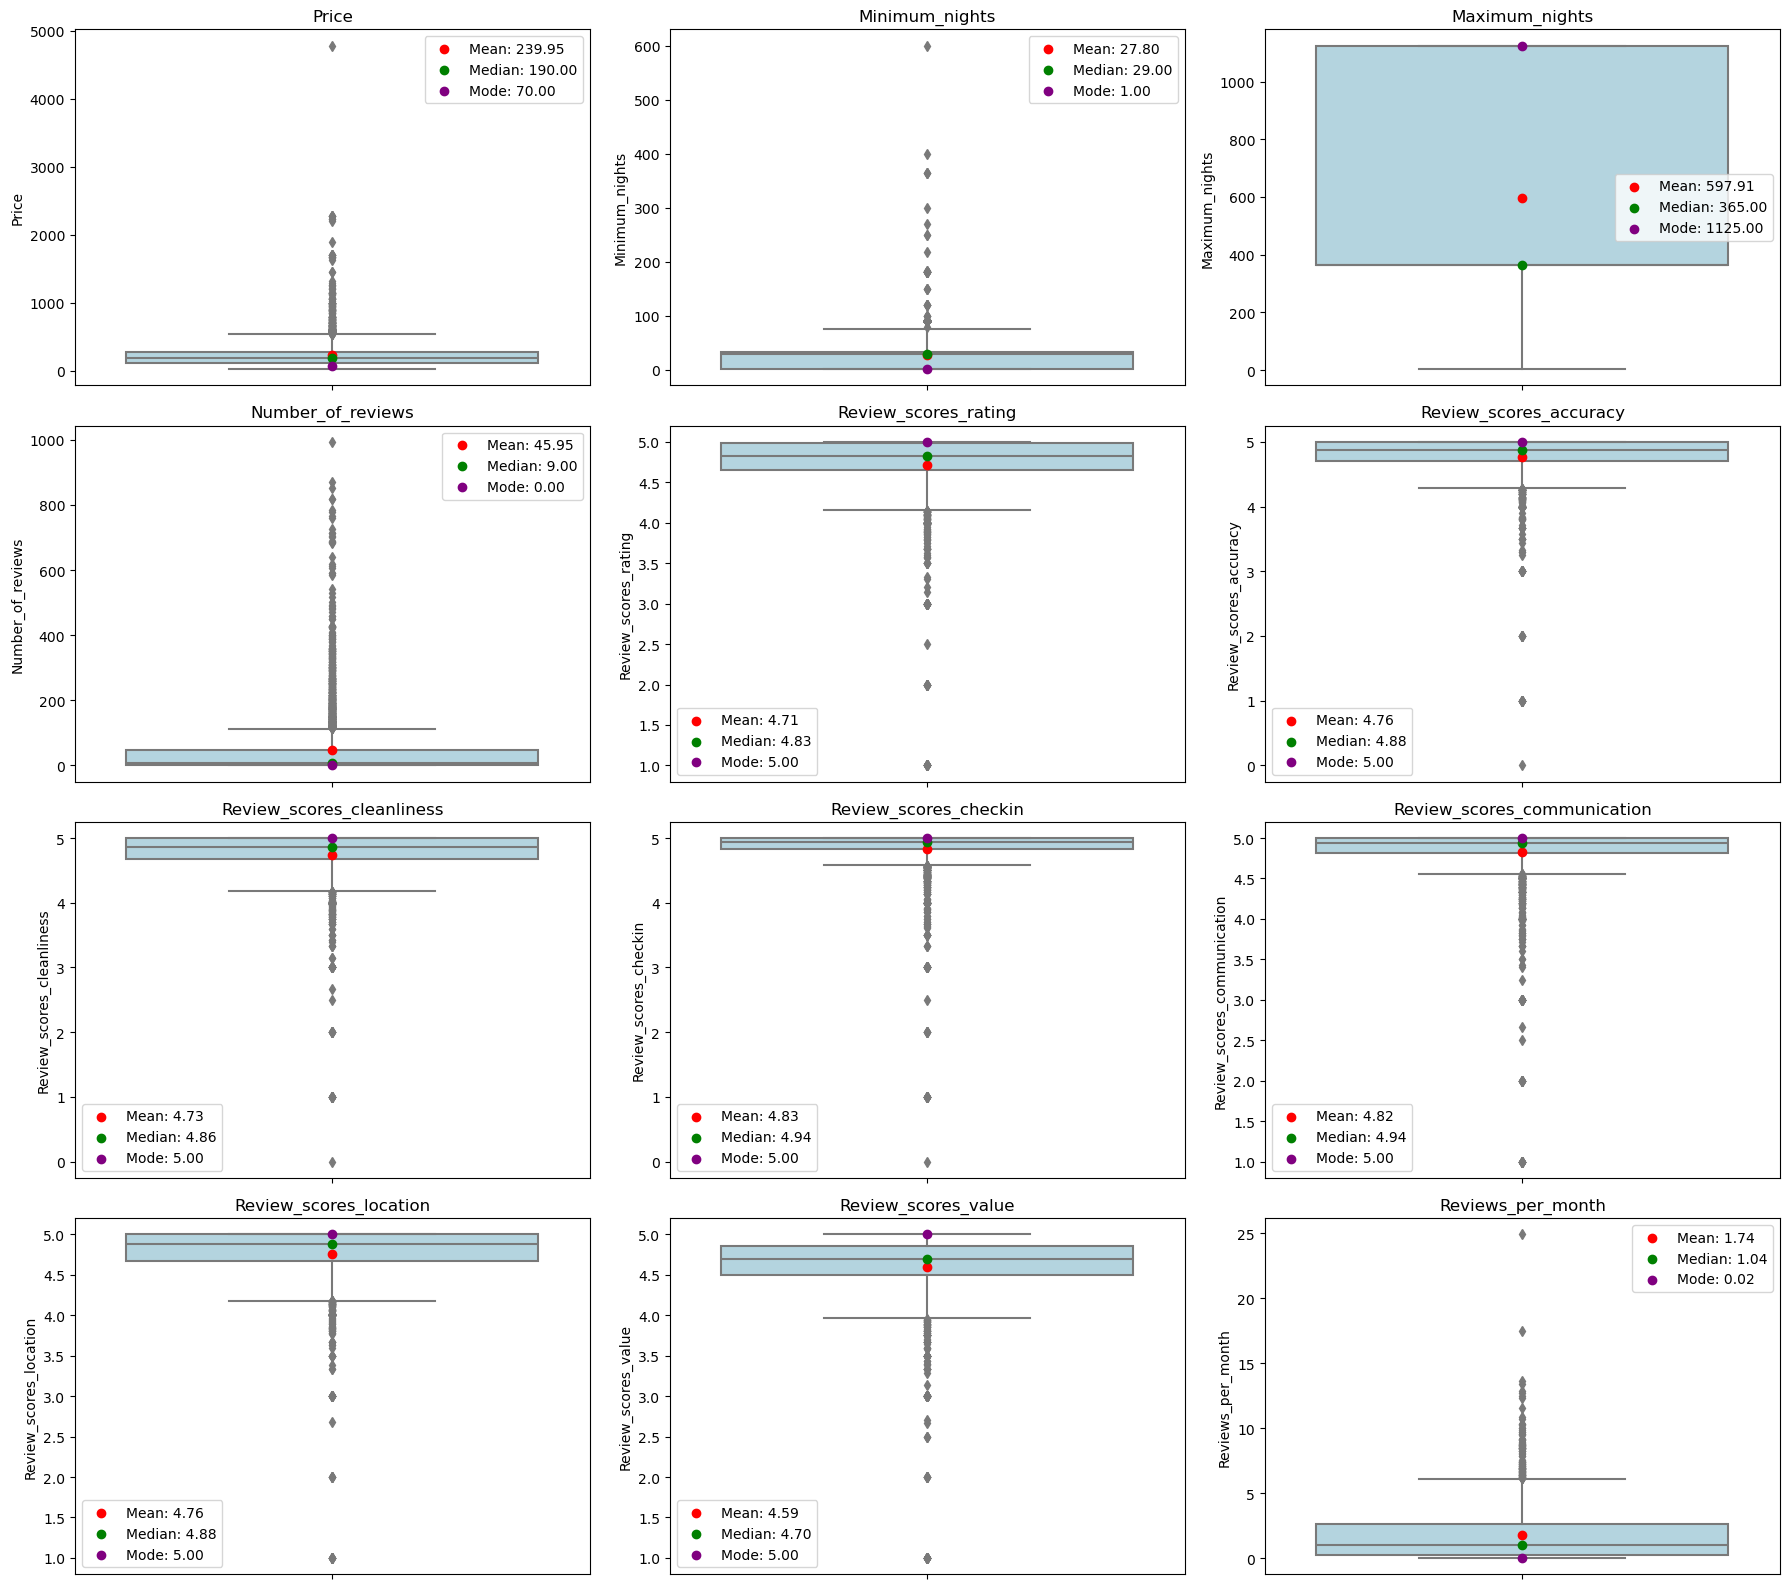

In [35]:
box_plot(listings, required_columns)

#### Box Plot Distribution - After removing the NaN values

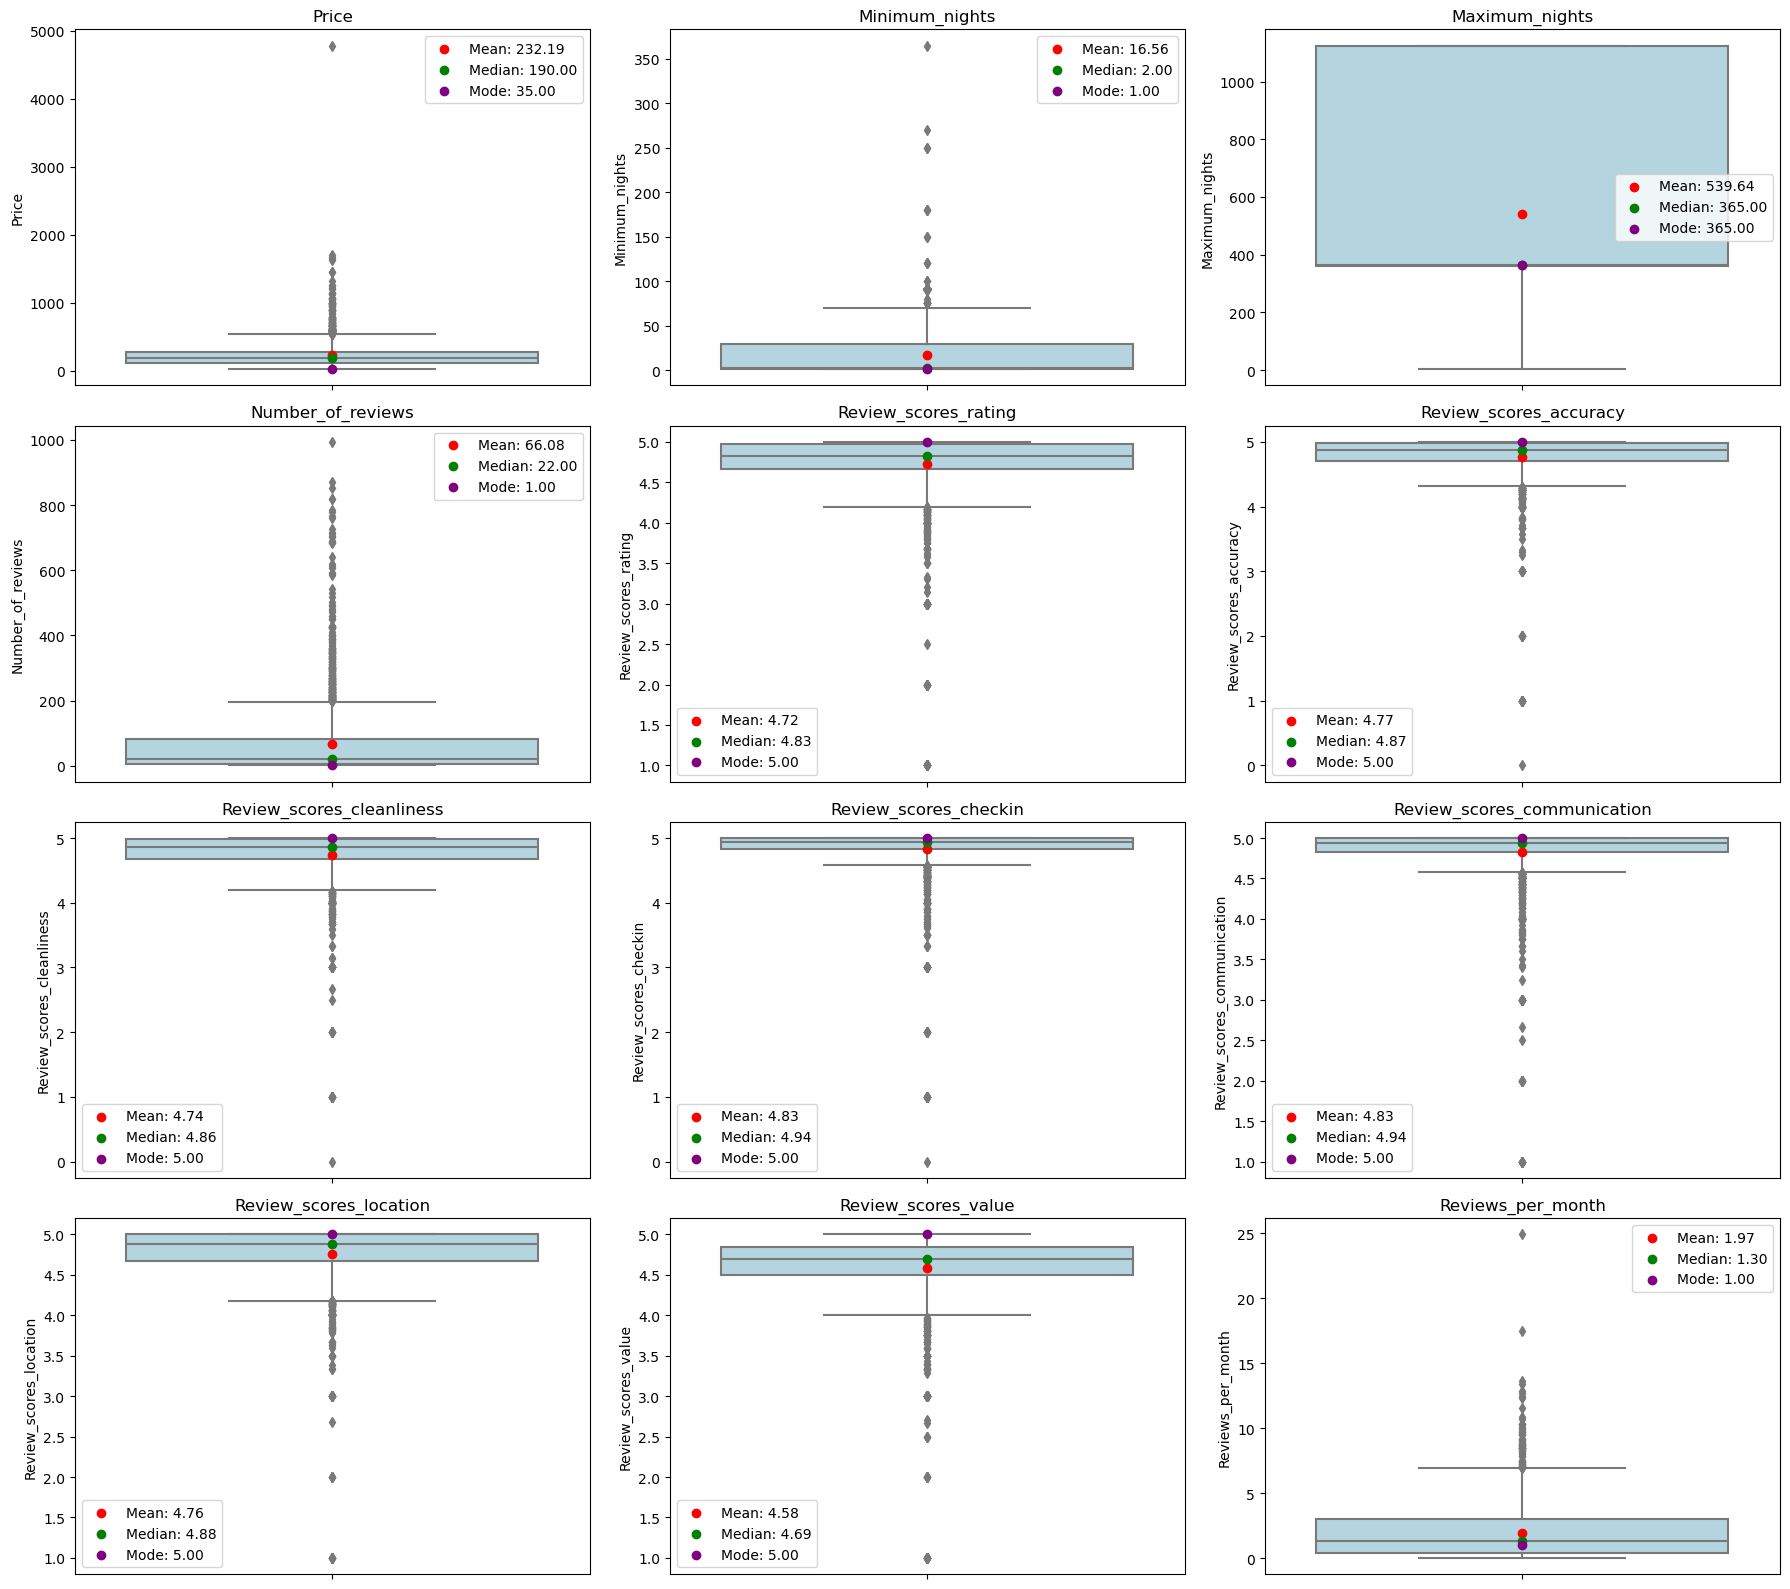

In [37]:
box_plot(not_null_listings, required_columns)

#### Dispersion

In [39]:
def violin_plot(df, columns):
    fig, axes = plt.subplots(4, 3, figsize=(18, 16))
    axes = axes.flatten()
    
    for i, column in enumerate(columns):
        col_data = df[column].dropna()
        variance = col_data.var()
        std_dev = col_data.std()
        data_range = col_data.max() - col_data.min()
        iqr = col_data.quantile(0.75) - col_data.quantile(0.25)
        
        sns.violinplot(y=col_data, ax=axes[i], color='lightblue')
        
        stats_text = (f'Variance: {variance:.2f}\n'
                      f'Std Dev: {std_dev:.2f}\n'
                      f'Range: {data_range:.2f}\n'
                      f'IQR: {iqr:.2f}')
        
        axes[i].set_title(f'{column.capitalize()}')
        axes[i].set_ylabel(column.capitalize())
        axes[i].text(0.65, 0.8, stats_text, transform=axes[i].transAxes, verticalalignment='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
        axes[i].grid(True)
    
    plt.tight_layout()
    plt.show()

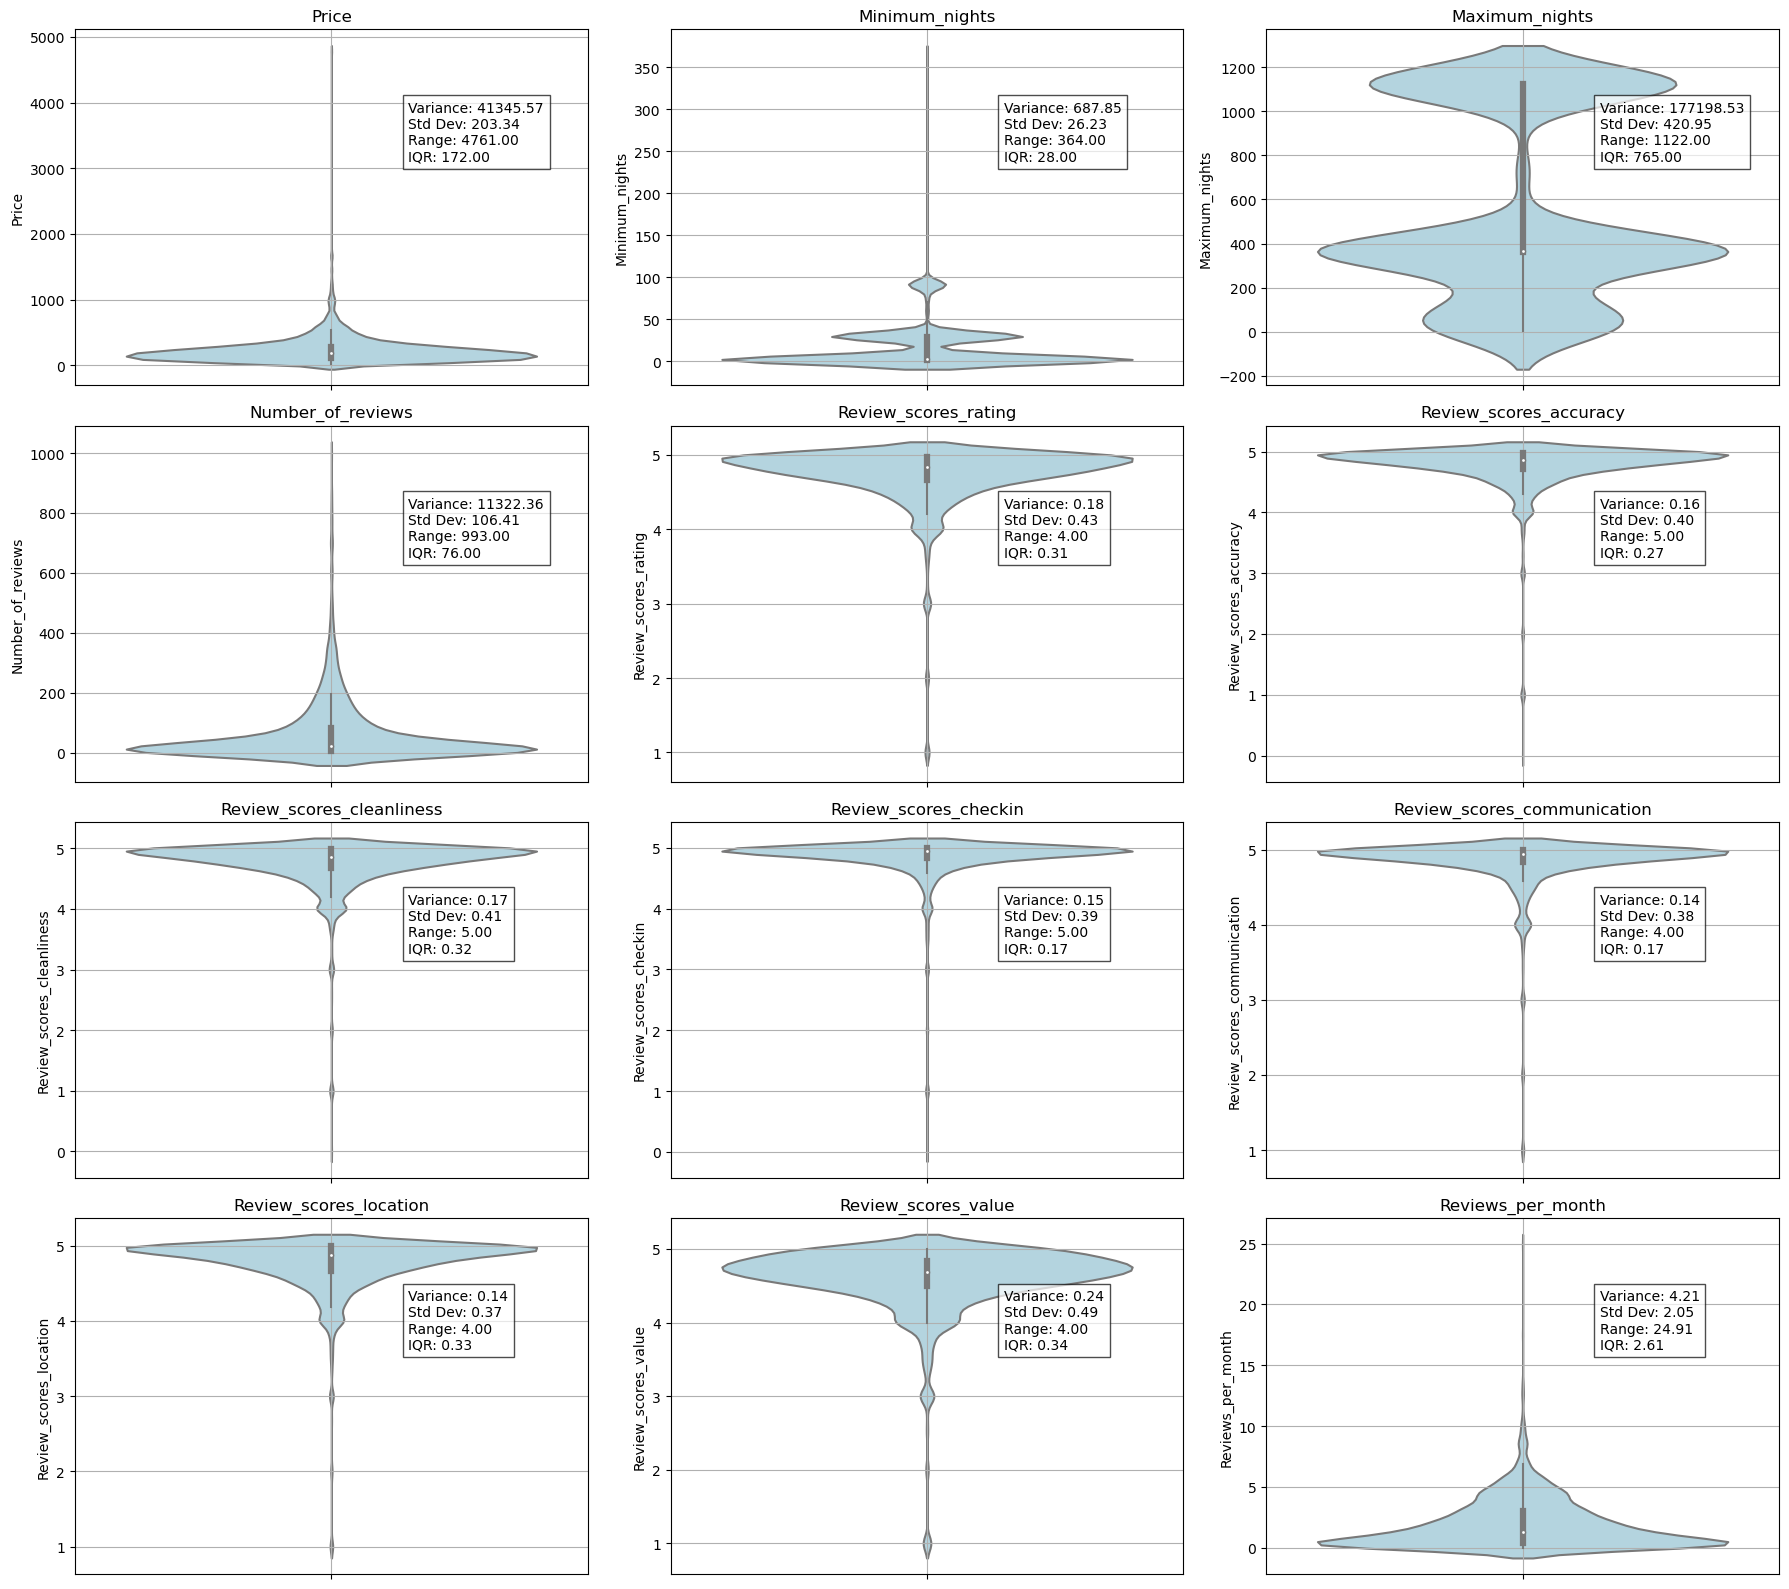

In [40]:
violin_plot(not_null_listings, required_columns)

#### Distribution

In [42]:
not_null_listings[required_columns].describe()

,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000
mean,232.190235,16.562025,539.641591,66.084268,4.720004,4.766644,4.744108,4.832445,4.830174,4.760054,4.583179,1.965946
std,203.336112,26.226972,420.949558,106.406566,0.425815,0.398672,0.414269,0.392703,0.377935,0.370593,0.485502,2.050620
min,25.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.010000
25%,112.000000,1.000000,360.000000,6.000000,4.660000,4.710000,4.670000,4.830000,4.830000,4.670000,4.500000,0.380000
50%,190.000000,2.000000,365.000000,22.000000,4.830000,4.870000,4.860000,4.940000,4.940000,4.880000,4.690000,1.300000
75%,284.000000,29.000000,1125.000000,82.000000,4.970000,4.980000,4.990000,5.000000,5.000000,5.000000,4.840000,2.990000
max,4786.000000,365.000000,1125.000000,994.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,24.920000


### Task 2 - Distribution Analysis
Plot histograms or density plots for key numerical features like `price`,
`minimum_nights`, and `review_scores_rating`. Analyze the distribution of
these features to identify any skewness or outliers.


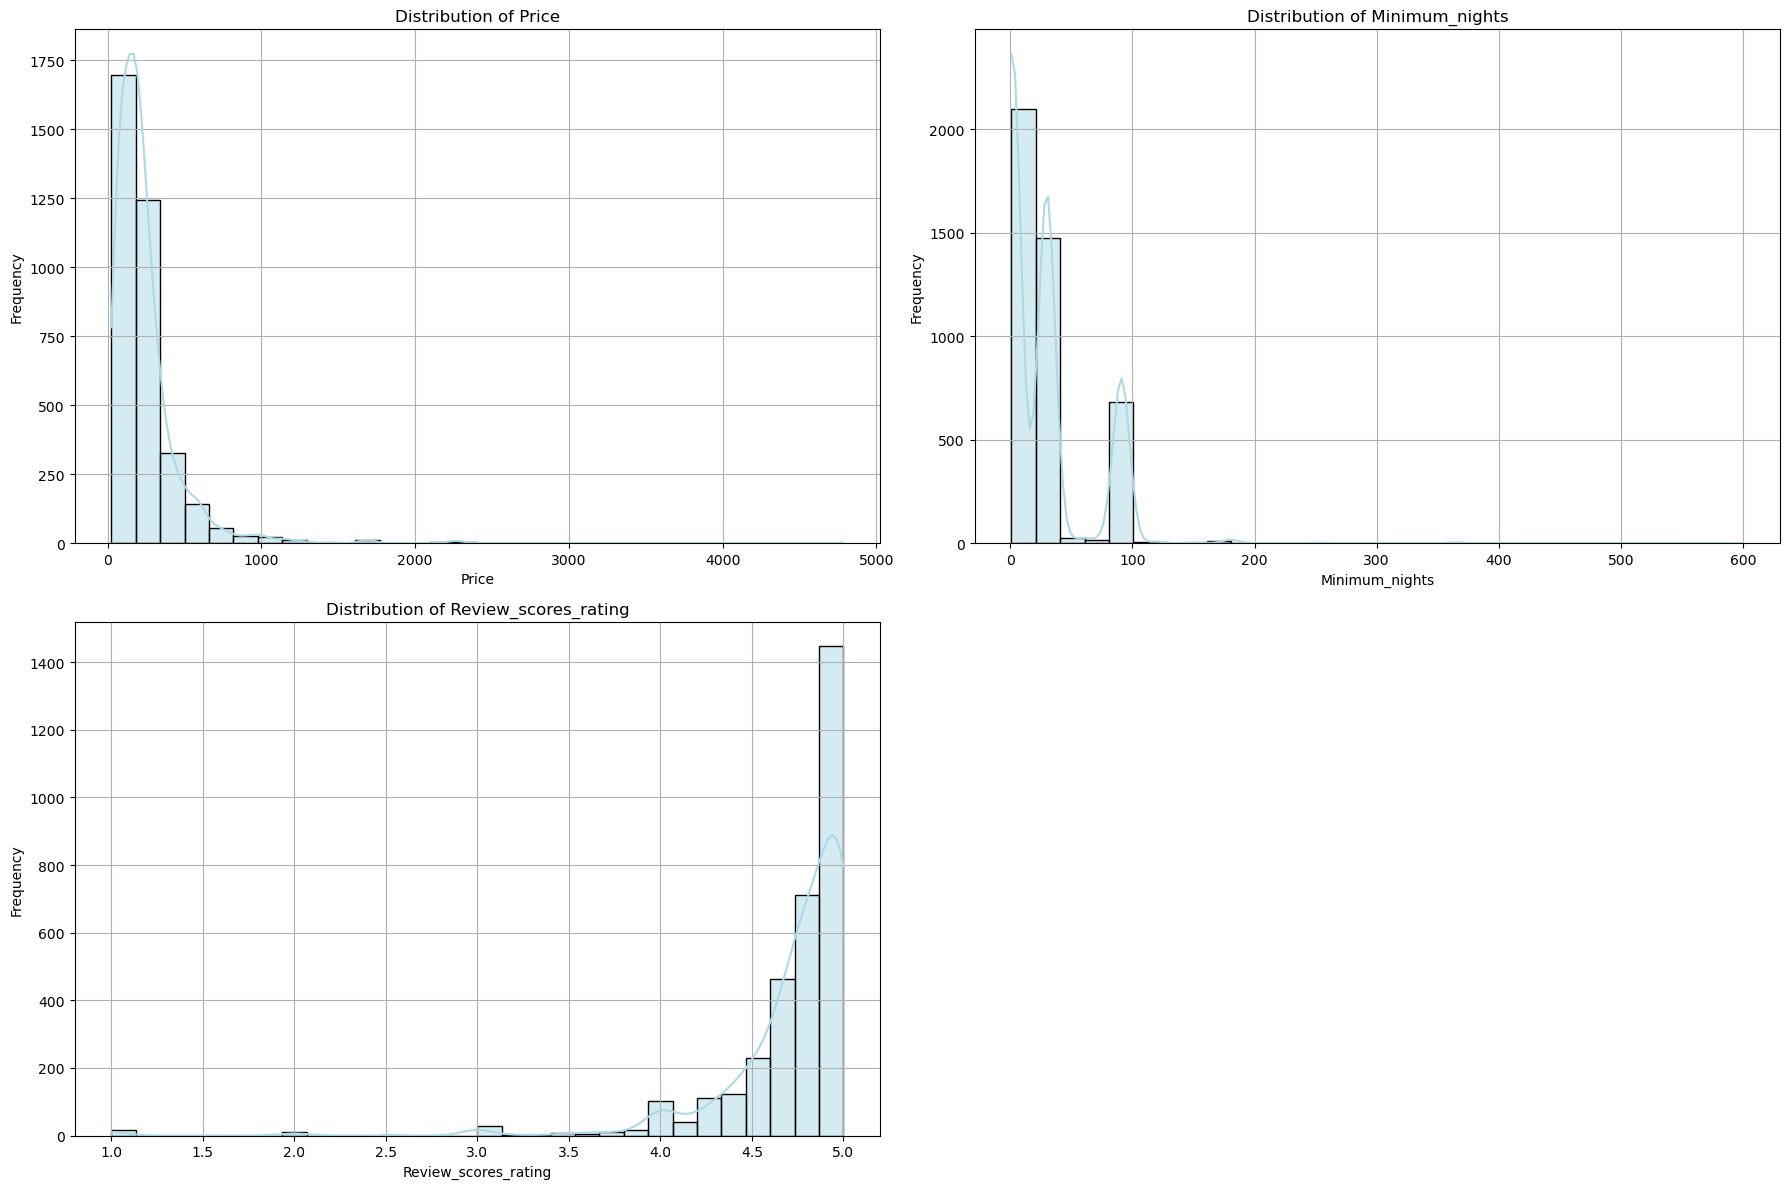

In [44]:
features = ['price', 'minimum_nights', 'review_scores_rating']

plt.figure(figsize=(18, 12))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1) 
    sns.histplot(listings[feature], bins=30, kde=True, color='lightblue')
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

#### Identifying skewness and outliers for the three attributes - price, minimum_ nights and review_scores_rating 

In [46]:
for feature in features:
    skewness = listings[feature].skew()
    print(f'Skewness of {feature}: {skewness}\n')

    Q1 = listings[feature].quantile(0.25)
    Q3 = listings[feature].quantile(0.75)
    IQR = Q3 - Q1
    outlier_thresholds = (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
    print(outlier_thresholds)
    outliers = listings[(listings[feature] < outlier_thresholds[0]) | (listings[feature] > outlier_thresholds[1])]

    print(f'Number of outliers in {feature}: {len(outliers)}\n')
    print('\n---------------------------------------------------------------\n')

Skewness of price: 5.2820837880855915

(-147.5, 544.5)
Number of outliers in price: 241


---------------------------------------------------------------

Skewness of minimum_nights: 2.9854213363849396

(-45.5, 78.5)
Number of outliers in minimum_nights: 716


---------------------------------------------------------------

Skewness of review_scores_rating: -4.534799720399738

(4.155, 5.4750000000000005)
Number of outliers in review_scores_rating: 225


---------------------------------------------------------------



#### Removing the outliers from the price column and plotting the histogram and the distribution graph

In [48]:
filter_price =  not_null_listings[not_null_listings['price'] <= 550]

In [49]:
def histogram_plot(before, after, column_name):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    axes[0].hist(before[column_name], bins=5, color='blue', edgecolor='black')
    axes[0].set_title('Histogram before removing outliers')
    axes[0].set_xlabel(f'Values in {column_name}')
    axes[0].set_ylabel('Frequency')
    
    axes[1].hist(after[column_name], bins=5, color='green', edgecolor='black')
    axes[1].set_title('Histogram after removing outliers')
    axes[1].set_xlabel(f'Values in {column_name}')
    axes[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

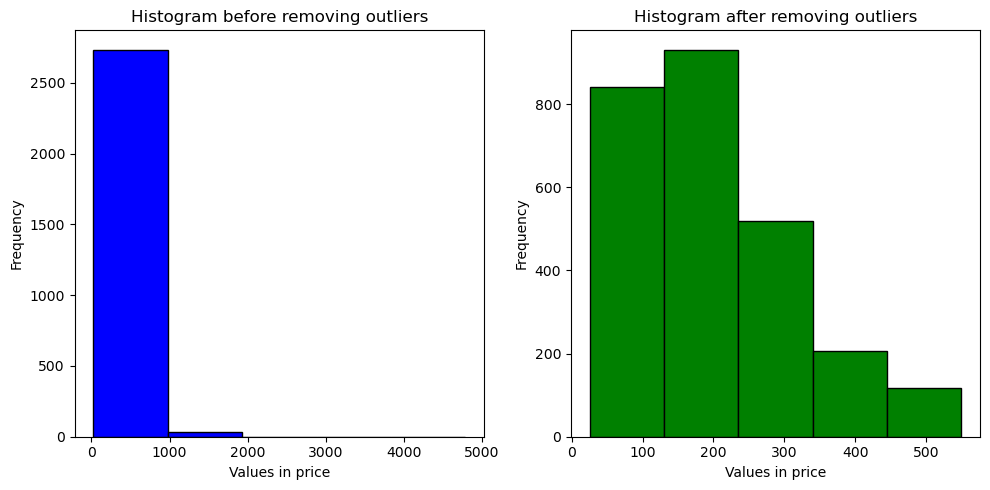

In [50]:
histogram_plot(not_null_listings, filter_price, 'price')

In [51]:
def density_plot(before, after, column_name):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    sns.kdeplot(before[column_name], ax=axes[0], color='blue', shade=True)
    axes[0].set_title('Distribution before removing outliers')
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Density')
    
    sns.kdeplot(after[column_name], ax=axes[1], color='green', shade=True)
    axes[1].set_title('Distribution after removing outliers')
    axes[1].set_xlabel(column_name)
    axes[1].set_ylabel('Density')
    
    plt.tight_layout()
    plt.show()

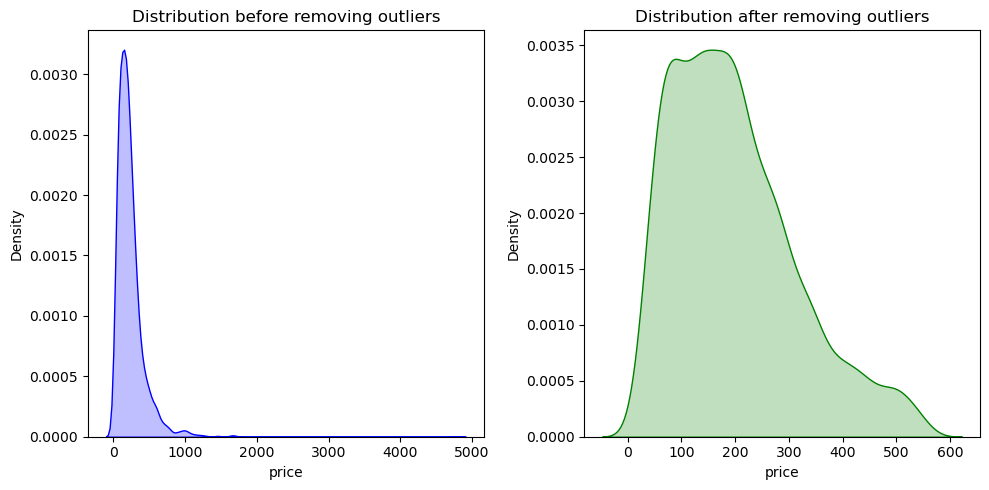

In [52]:
density_plot(not_null_listings, filter_price, 'price')

#### Removing the outliers from the minimum_nights column and plotting the histogram and the distribution graph

Since we are looking at tourist data and our target audience is tourists who stay for around 2 weeks to one month, we consider the normal range to be 14 days to 30 days.

In [55]:
filter_minimum_nights =  not_null_listings[not_null_listings['minimum_nights'] >= 14]
filter_minimum_nights =  filter_minimum_nights[filter_minimum_nights['minimum_nights'] <= 80]
filter_minimum_nights

,id,host_response_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,amenities,...,review_scores_rating,instant_bookable,reviews_per_month,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,3781,80%,t,East Boston,NaN,42.364130,-71.029910,Entire rental unit,Entire home/apt,"[""Central air conditioning"", ""Free street park...",...,4.96,f,0.23,25,5.00,4.96,5.00,4.96,4.84,4.88
5,10813,98%,f,Back Bay,NaN,42.350610,-71.087870,Entire rental unit,Entire home/apt,"[""Fire extinguisher"", ""Dishwasher"", ""Bed linen...",...,5.00,f,0.08,5,5.00,4.80,5.00,5.00,5.00,4.80
6,10986,98%,f,North End,NaN,42.363770,-71.052060,Entire condo,Entire home/apt,"[""Free dryer \u2013 In building"", ""Fire exting...",...,4.00,f,0.18,1,5.00,3.00,2.00,5.00,5.00,4.00
7,18711,72%,f,Dorchester,NaN,42.322120,-71.060960,Entire rental unit,Entire home/apt,"[""Fire extinguisher"", ""Free street parking"", ""...",...,4.31,t,0.30,52,4.50,4.71,4.56,4.46,4.24,4.48
9,40601,100%,t,Jamaica Plain,NaN,42.313470,-71.110820,Private room in home,Private room,"[""Laundromat nearby"", ""Hammock"", ""Central air ...",...,4.98,f,0.59,99,4.95,5.00,4.97,4.94,4.93,4.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,1152488151302138066,100%,t,Brighton,NaN,42.346281,-71.145366,Entire rental unit,Entire home/apt,"[""Gym"", ""Laundromat nearby"", ""Courtyard view"",...",...,4.60,t,4.29,5,5.00,4.60,4.40,4.60,4.80,4.20
4221,1152517706074506494,100%,t,Brighton,NaN,42.348260,-71.145950,Entire rental unit,Entire home/apt,"[""Gym"", ""Fire extinguisher"", ""Free street park...",...,5.00,t,4.86,6,4.83,5.00,5.00,5.00,4.83,4.83
4256,1167009999212389676,99%,t,Beacon Hill,NaN,42.359387,-71.063519,Entire rental unit,Entire home/apt,"[""Dishwasher"", ""Long term stays allowed"", ""Car...",...,4.00,f,3.00,3,5.00,5.00,5.00,5.00,5.00,4.00
4292,1176861035408746030,100%,t,Brighton,NaN,42.346146,-71.144161,Entire rental unit,Entire home/apt,"[""Gym"", ""Laundromat nearby"", ""Free street park...",...,5.00,t,2.00,2,5.00,5.00,5.00,5.00,5.00,5.00


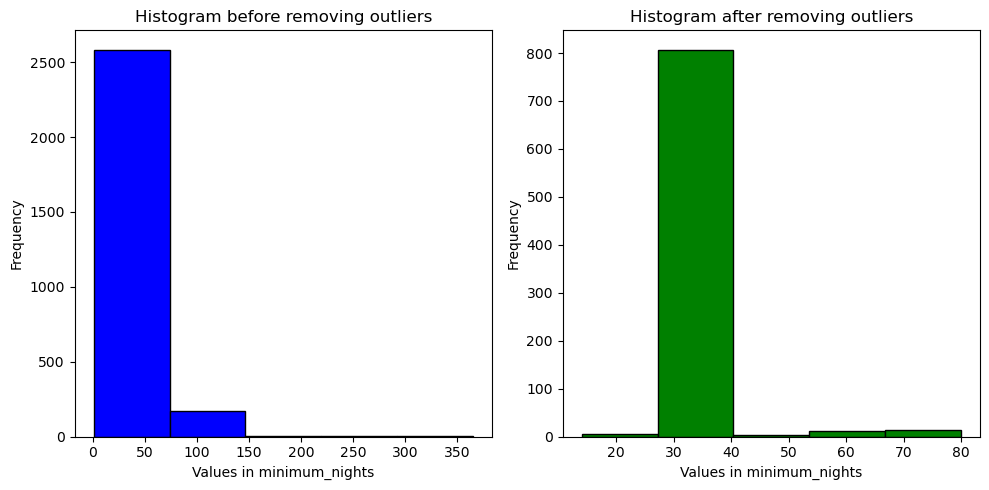

In [56]:
histogram_plot(not_null_listings, filter_minimum_nights, 'minimum_nights')

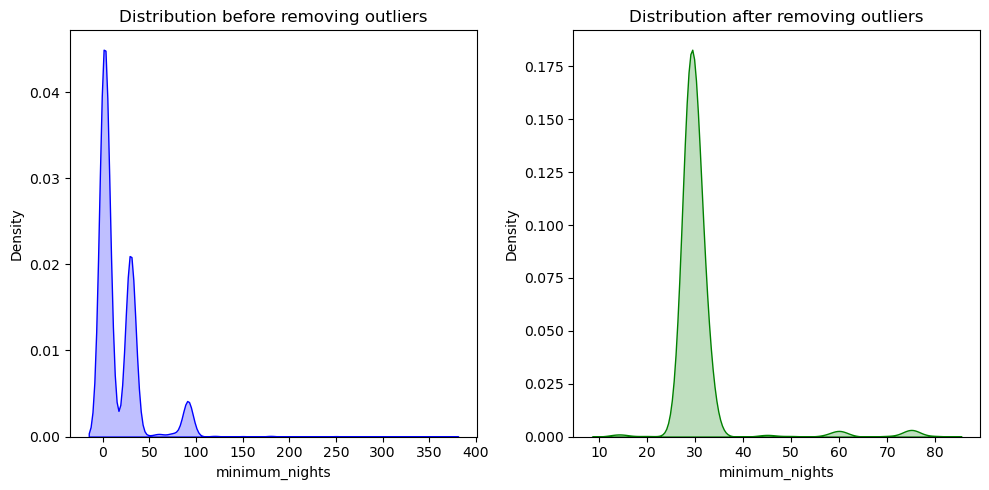

In [57]:
density_plot(not_null_listings, filter_minimum_nights, 'minimum_nights')

#### Removing the outliers from the review_scores_rating column and plotting the histogram and the distribution graph

In [59]:
filter_review_score = not_null_listings[not_null_listings['review_scores_rating'] >= 4]

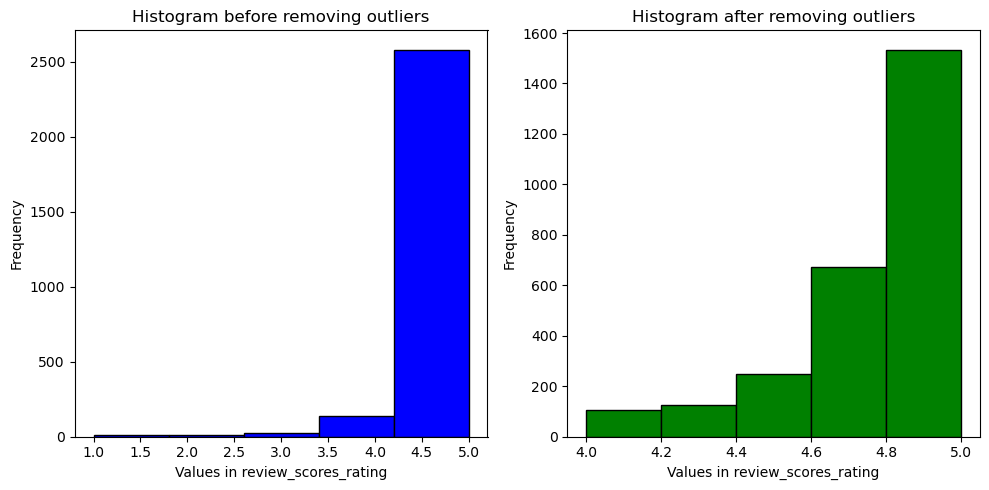

In [60]:
histogram_plot(not_null_listings, filter_review_score, 'review_scores_rating')

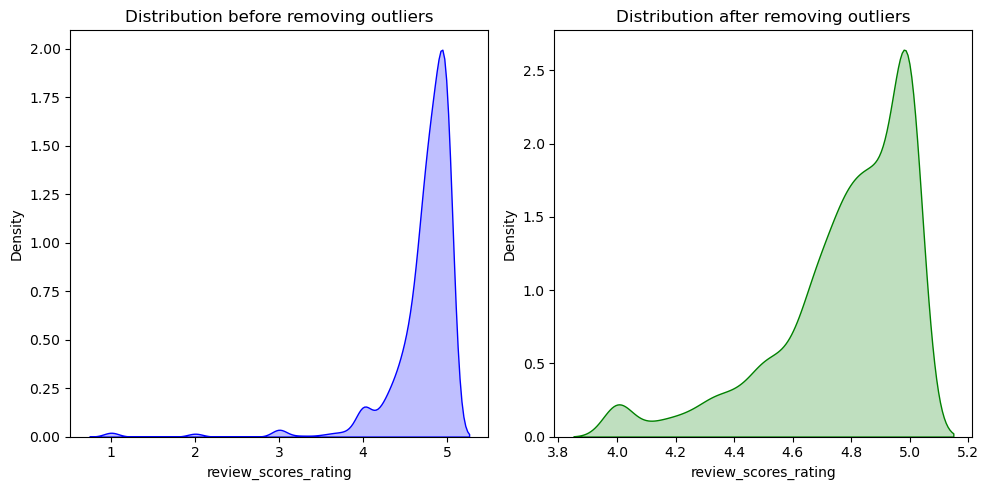

In [61]:
density_plot(not_null_listings, filter_review_score, 'review_scores_rating')

#### 3. Correlation Analysis
Create a correlation matrix to explore relationships between numerical
variables such as `price`, `number_of_reviews`, `availability_365`, and
`review_scores_rating`.
Identify any strong correlations that might be useful for predictive modeling
or further investigation.

In [63]:
columns_for_correlation = ['price', 'number_of_reviews', 'availability_365', 'review_scores_rating']

correlation_matrix = listings[columns_for_correlation].corr()

correlation_matrix

,price,number_of_reviews,availability_365,review_scores_rating
price,1.000000,-0.027068,0.033836,0.088569
number_of_reviews,-0.027068,1.000000,-0.045956,0.100892
availability_365,0.033836,-0.045956,1.000000,-0.056409
review_scores_rating,0.088569,0.100892,-0.056409,1.000000


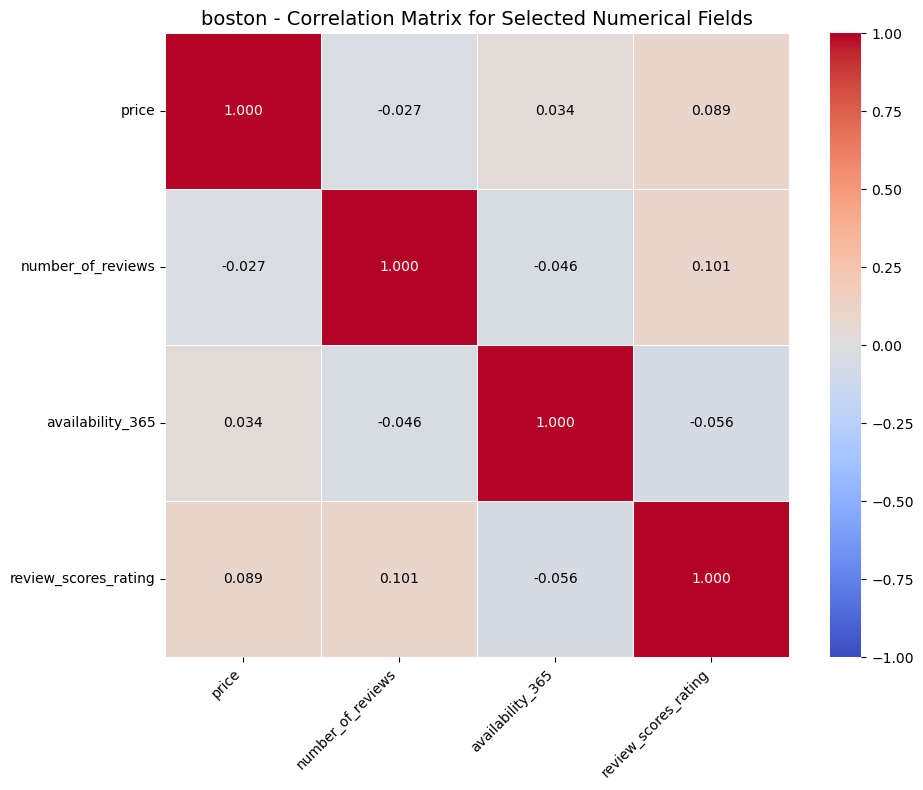

In [64]:
plt.figure(figsize=(10, 8))
    
ax = sns.heatmap(correlation_matrix, 
                     cmap='coolwarm', 
                     vmin=-1, vmax=1,
                     square=True,
                     linewidths=0.5)

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = f"{correlation_matrix.iloc[i, j]:.3f}"
        ax.text(j + 0.5, i + 0.5, text,
                    ha="center", va="center", 
                    color="black" if abs(correlation_matrix.iloc[i, j]) < 0.7 else "white",
                    fontsize=10)

plt.title(f"{city} - Correlation Matrix for Selected Numerical Fields", fontsize=14)
    
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
    
plt.tight_layout()
plt.show()

#### Converting some of the categorical values such as room_type, amenities, instant_bookable, host_is_superhost, neighbourhood_group_cleansed into numerical values to find correlation

In [66]:
category_list = listings['room_type'].unique()
category_list

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [67]:
listings_copy = listings[:]

#### Converting room_type categorical values into numerical values and adding a new attribute room_type_numerical

In [69]:
listings_copy['room_type_numerical'] = pd.factorize(listings_copy['room_type'])[0]

category_mapping = dict(enumerate(pd.factorize(listings_copy['room_type'])[1]))

category_mapping

{0: 'Entire home/apt', 1: 'Private room', 2: 'Shared room', 3: 'Hotel room'}

#### Analyzing the feasibility of converting property_type into a numerical column

Since we have already encoded for room_type which is just a broader categorization of property_type, we do not perform encoding for this attribute

In [71]:
category_property_type = listings['property_type'].unique()
category_property_type

array(['Entire rental unit', 'Entire guest suite', 'Entire condo',
       'Private room in home', 'Private room in rental unit',
       'Private room in townhouse', 'Private room in condo',
       'Entire home', 'Entire townhouse', 'Boat', 'Entire loft',
       'Private room in bed and breakfast', 'Room in aparthotel',
       'Shared room in home', 'Entire guesthouse',
       'Entire serviced apartment', 'Private room in villa',
       'Private room in guest suite', 'Private room',
       'Private room in bungalow', 'Private room in loft',
       'Shared room in condo', 'Entire place',
       'Shared room in rental unit', 'Private room in guesthouse',
       'Room in boutique hotel', 'Room in hotel', 'Houseboat',
       'Shared room in townhouse', 'Shared room in bed and breakfast',
       'Private room in serviced apartment',
       'Shared room in boutique hotel', 'Private room in casa particular',
       'Private room in vacation home', 'Shared room in vacation home',
       'Entire

#### Converting amenities into a categorical value by calculating the number of amenities

In [73]:
def count_elements(text):
    if pd.isnull(text): 
        return 0
    return len(str(text).split(','))  

listings_copy['amenities_count'] = listings_copy['amenities'].apply(count_elements)
listings_copy['amenities_count']

0       28
1       29
2       29
3       33
4       22
        ..
4320    27
4321    25
4322    26
4323    47
4324    13
Name: amenities_count, Length: 4325, dtype: int64

#### Converting neighbourhood_cleansed categorical values into numerical values and adding a new attribute neighbolurhood_group_numerical

In [75]:
listings_copy['neighbourhood_group_numerical'] = pd.factorize(listings_copy['neighbourhood_cleansed'])[0]

category_mapping = dict(enumerate(pd.factorize(listings_copy['neighbourhood_cleansed'])[1]))

f'Category to number mapping: {category_mapping}'

"Category to number mapping: {0: 'East Boston', 1: 'Roxbury', 2: 'Beacon Hill', 3: 'Back Bay', 4: 'North End', 5: 'Dorchester', 6: 'Charlestown', 7: 'Jamaica Plain', 8: 'Downtown', 9: 'South Boston', 10: 'Bay Village', 11: 'Brighton', 12: 'West Roxbury', 13: 'Roslindale', 14: 'South End', 15: 'Mission Hill', 16: 'Fenway', 17: 'Allston', 18: 'Hyde Park', 19: 'West End', 20: 'Mattapan', 21: 'Leather District', 22: 'South Boston Waterfront', 23: 'Chinatown', 24: 'Longwood Medical Area'}"

#### Converting host_is_superhost categorical values into numerical values and adding a new attribute host_is_superhost_numerical

In [77]:
listings_copy['host_is_superhost_numeric'] = listings_copy['host_is_superhost'].map({'t': 1, 'f': 0})
listings_copy[['host_is_superhost', 'host_is_superhost_numeric']].head()

,host_is_superhost,host_is_superhost_numeric
0,t,1.0
1,t,1.0
2,t,1.0
3,t,1.0
4,f,0.0


#### Converting instant_bookable categorical values into numerical values and adding a new attribute instant_bookable_numeric

In [79]:
listings_copy['instant_bookable_numeric'] = listings_copy['instant_bookable'].map({'t': 1, 'f': 0})
listings_copy[['instant_bookable', 'instant_bookable_numeric']].head()

,instant_bookable,instant_bookable_numeric
0,f,0
1,f,0
2,f,0
3,f,0
4,f,0


#### Plotting heatmap for correlation for additional variables

In [81]:
columns_for_correlation = ['price', 'number_of_reviews', 'availability_365', 'review_scores_rating',
                           'room_type_numerical', 'amenities_count', 'neighbourhood_group_numerical', 
                           'host_is_superhost_numeric', 'instant_bookable_numeric']

correlation_matrix = listings_copy[columns_for_correlation].corr()

correlation_matrix

,price,number_of_reviews,availability_365,review_scores_rating,room_type_numerical,amenities_count,neighbourhood_group_numerical,host_is_superhost_numeric,instant_bookable_numeric
price,1.000000,-0.027068,0.033836,0.088569,-0.086303,0.114511,0.011186,-0.063592,0.161768
number_of_reviews,-0.027068,1.000000,-0.045956,0.100892,-0.021223,0.178093,-0.092927,0.278961,-0.099748
availability_365,0.033836,-0.045956,1.000000,-0.056409,-0.055577,0.036025,-0.001328,-0.091909,0.091117
review_scores_rating,0.088569,0.100892,-0.056409,1.000000,-0.028276,0.188344,-0.013689,0.253023,-0.124432
room_type_numerical,-0.086303,-0.021223,-0.055577,-0.028276,1.000000,-0.242341,-0.016421,-0.023373,-0.023722
amenities_count,0.114511,0.178093,0.036025,0.188344,-0.242341,1.000000,-0.027354,0.369510,-0.038087
neighbourhood_group_numerical,0.011186,-0.092927,-0.001328,-0.013689,-0.016421,-0.027354,1.000000,-0.042378,0.090393
host_is_superhost_numeric,-0.063592,0.278961,-0.091909,0.253023,-0.023373,0.369510,-0.042378,1.000000,-0.108408
instant_bookable_numeric,0.161768,-0.099748,0.091117,-0.124432,-0.023722,-0.038087,0.090393,-0.108408,1.000000


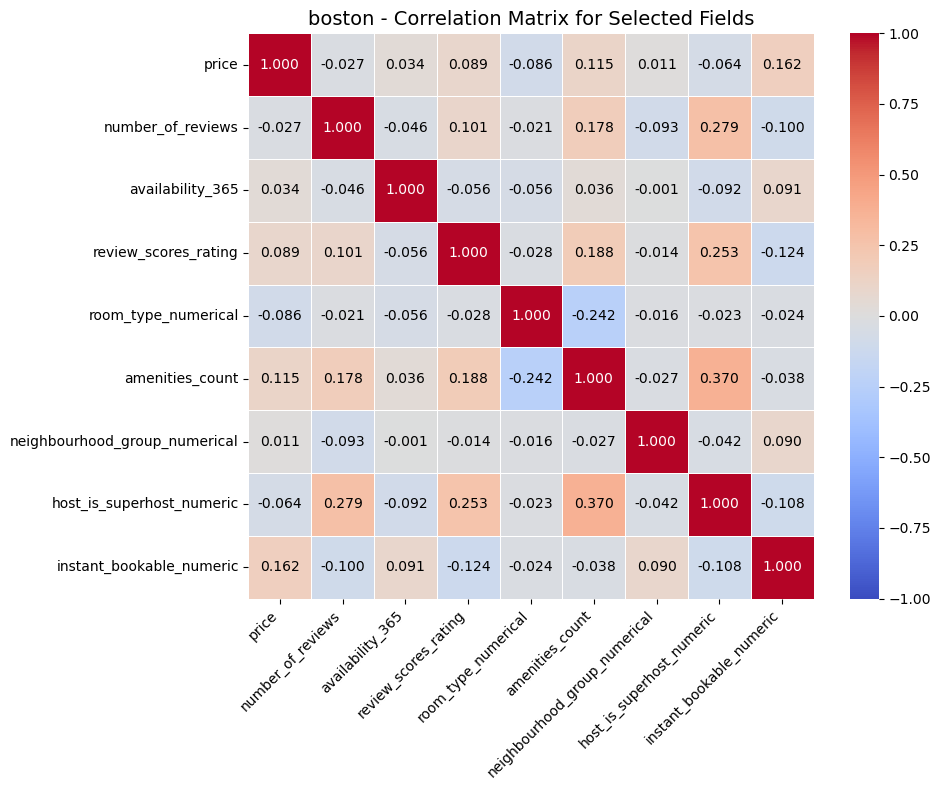

In [82]:
plt.figure(figsize=(10, 8))
    
ax = sns.heatmap(correlation_matrix, 
                     cmap='coolwarm', 
                     vmin=-1, vmax=1,
                     square=True,
                     linewidths=0.5)

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = f"{correlation_matrix.iloc[i, j]:.3f}"
        ax.text(j + 0.5, i + 0.5, text,
                    ha="center", va="center", 
                    color="black" if abs(correlation_matrix.iloc[i, j]) < 0.7 else "white",
                    fontsize=10)

plt.title(f"{city} - Correlation Matrix for Selected Fields", fontsize=14)
    
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
    
plt.tight_layout()
plt.show()

#### 4. Price Analysis
Analyze the distribution of prices across different neighborhoods
(`host_neighbourhood`) or room types (if available). Understand which
neighborhoods have higher or lower average prices and whether certain
neighborhoods are more popular for shortterm or longterm stays.

#### 4.1 We group the listings based on neighbourhood groups and calculate the mean price for each neighbourhood

In [85]:
price_not_null_listings = listings.dropna(subset=['price'])

In [86]:
grouped_neighbourhoods = price_not_null_listings.groupby('neighbourhood_cleansed', as_index=False)['price'].mean()
grouped_neighbourhoods

,neighbourhood_cleansed,price
0,Allston,150.791667
1,Back Bay,320.277612
2,Bay Village,501.910256
3,Beacon Hill,247.161850
4,Brighton,165.736170
5,Charlestown,296.276923
6,Chinatown,276.617647
7,Dorchester,155.123853
8,Downtown,349.513678
9,East Boston,201.633987


#### We plot the function to plot the bar graph for the distribution of price based on different factors

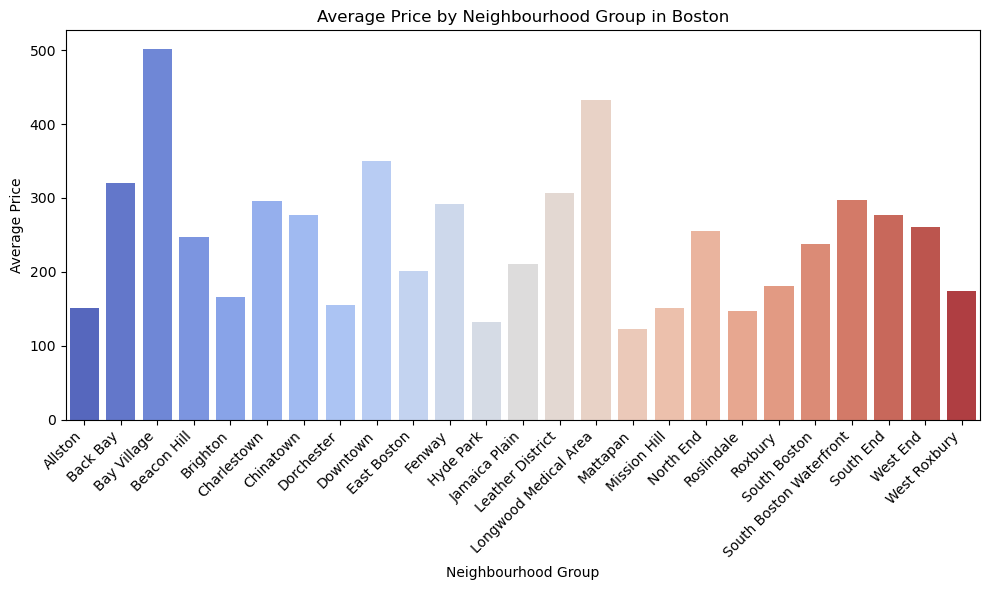

In [88]:
def plot_bargraph(df, axis, label):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=axis, y='price', data=df, palette='coolwarm')
    
    plt.xlabel(label)
    plt.ylabel('Average Price')
    plt.title(f'Average Price by {label} in {city.capitalize()}')
    
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    

plot_bargraph(grouped_neighbourhoods, 'neighbourhood_cleansed', 'Neighbourhood Group')

In [89]:
grouped_neighbourhoods.isnull().sum()

neighbourhood_cleansed    0
price                     0
dtype: int64

In [90]:
price_not_null_listings_room_type = listings_copy.dropna(subset=['price'])
price_not_null_listings_room_type

,id,host_response_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,amenities,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,room_type_numerical,amenities_count,neighbourhood_group_numerical,host_is_superhost_numeric,instant_bookable_numeric
0,3781,80%,t,East Boston,NaN,42.364130,-71.029910,Entire rental unit,Entire home/apt,"[""Central air conditioning"", ""Free street park...",...,4.96,5.00,4.96,4.84,4.88,0,28,0,1.0,0
1,5506,100%,t,Roxbury,NaN,42.328440,-71.095810,Entire guest suite,Entire home/apt,"[""Fire extinguisher"", ""Free street parking"", ""...",...,4.90,4.95,4.89,4.56,4.75,0,29,1,1.0,0
2,6695,100%,t,Roxbury,NaN,42.328020,-71.093870,Entire condo,Entire home/apt,"[""Fire extinguisher"", ""Free street parking"", ""...",...,4.87,4.90,4.95,4.52,4.72,0,29,1,1.0,0
3,8789,100%,t,Beacon Hill,NaN,42.358670,-71.063070,Entire rental unit,Entire home/apt,"[""Fire extinguisher"", ""Bed linens"", ""Long term...",...,4.55,4.93,4.97,4.97,4.59,0,33,2,1.0,0
4,10811,98%,f,Back Bay,NaN,42.351730,-71.086850,Entire rental unit,Entire home/apt,"[""Fire extinguisher"", ""Bed linens"", ""Long term...",...,4.67,4.56,4.00,5.00,4.67,0,22,3,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,1181310640039457019,100%,f,Roxbury,NaN,42.339042,-71.080357,Entire rental unit,Entire home/apt,"[""Mini fridge"", ""Fire extinguisher"", ""Bed line...",...,NaN,NaN,NaN,NaN,NaN,0,27,1,0.0,1
4321,1181310920532325010,100%,f,Roxbury,NaN,42.339042,-71.080357,Entire rental unit,Entire home/apt,"[""Mini fridge"", ""Fire extinguisher"", ""Bed line...",...,NaN,NaN,NaN,NaN,NaN,0,25,1,0.0,1
4322,1181311064422167794,100%,f,Roxbury,NaN,42.339042,-71.080357,Entire rental unit,Entire home/apt,"[""Mini fridge"", ""Fire extinguisher"", ""Bed line...",...,NaN,NaN,NaN,NaN,NaN,0,26,1,0.0,1
4323,1182535715185750063,100%,f,South End,NaN,42.345838,-71.064972,Entire rental unit,Entire home/apt,"[""Laundromat nearby"", ""Fire extinguisher"", ""Di...",...,NaN,NaN,NaN,NaN,NaN,0,47,14,0.0,0


#### 4.2 We group the listings based on room_type and calculate the mean price for each neighbourhood

In [92]:
room_types_grouped = price_not_null_listings_room_type.groupby('room_type_numerical', as_index=False)['price'].mean()
room_types_grouped

,room_type_numerical,price
0,0,280.356618
1,1,117.125479
2,2,86.615385
3,3,1063.763158


#### Plotting the bar graph for price distribution based on room_type

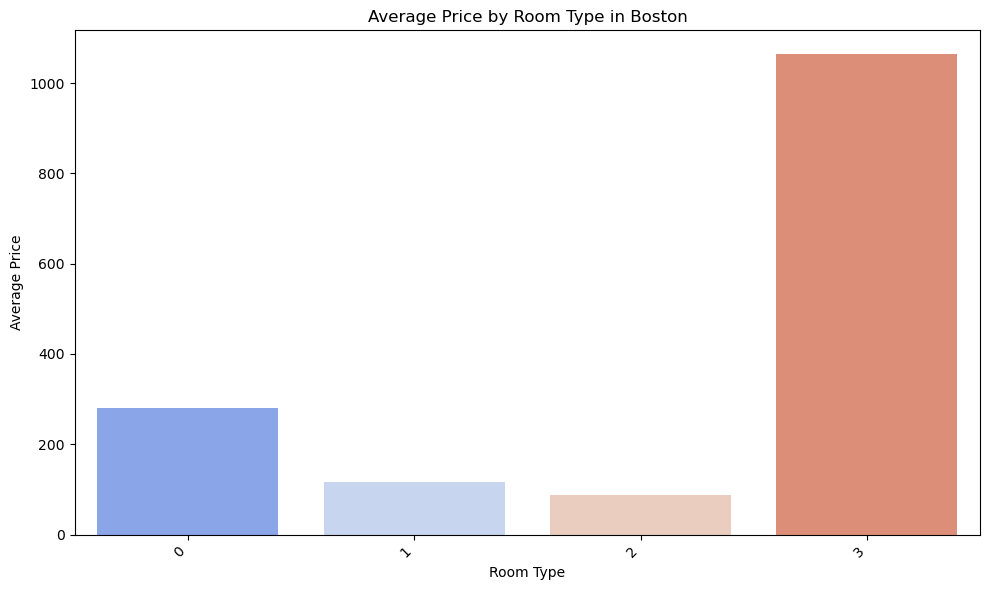

In [94]:
plot_bargraph(room_types_grouped, 'room_type_numerical', 'Room Type')

#### Plotting heatmap for price based on latitude and longitude

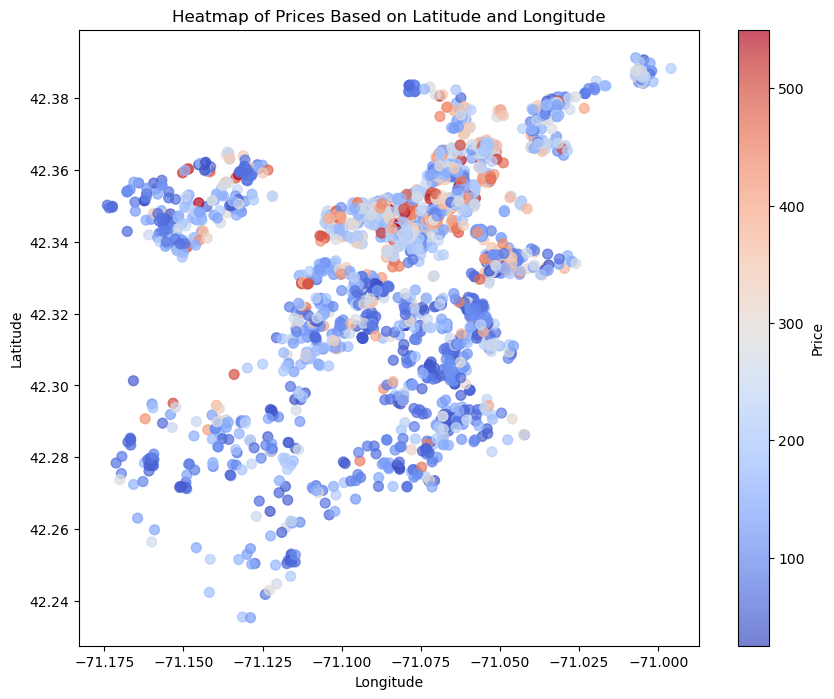

In [96]:
plt.figure(figsize=(10, 8))

scatter = plt.scatter(
    x=filter_price['longitude'], 
    y=filter_price['latitude'], 
    c=filter_price['price'],
    cmap='coolwarm',
    s=50,
    alpha=0.7
)

plt.colorbar(scatter, label='Price')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of Prices Based on Latitude and Longitude')

plt.show()

#### 4.1 We group the listings based on neighbourhood_groups and calculate the mean minimum_nights for each neighbourhood

In [98]:
price_not_null_listings['minimum_nights'].describe()

count    3543.000000
mean       21.672876
std        29.351296
min         1.000000
25%         1.000000
50%         4.000000
75%        30.000000
max       365.000000
Name: minimum_nights, dtype: float64

In [99]:
grouped_neighbourhoods = price_not_null_listings.groupby('neighbourhood_cleansed', as_index=False)['minimum_nights'].mean()
grouped_neighbourhoods

,neighbourhood_cleansed,minimum_nights
0,Allston,46.650000
1,Back Bay,16.262687
2,Bay Village,10.871795
3,Beacon Hill,23.739884
4,Brighton,30.255319
5,Charlestown,15.676923
6,Chinatown,29.823529
7,Dorchester,25.605505
8,Downtown,15.756839
9,East Boston,11.111111


#### We categorize the stays as Short term, Medium term and Long Term based on duration

In [101]:
def categorize_stay(nights):
    if nights <= 30: return 'Short Term'
    elif nights > 90: return 'Long Term'
    else: return 'Medium Term'

price_not_null_listings['stay_type'] = price_not_null_listings['minimum_nights'].apply(categorize_stay)

grouped_stay_type = price_not_null_listings.groupby(['neighbourhood_cleansed', 'stay_type'], as_index=False).size()

pivoted_stay_type = grouped_stay_type.pivot(index='neighbourhood_cleansed', columns='stay_type', values='size').fillna(0)

pivoted_stay_type['Predominant Stay Type'] = pivoted_stay_type[['Short Term', 'Long Term']].idxmax(axis=1)

pivoted_stay_type

stay_type,Long Term,Medium Term,Short Term,Predominant Stay Type
neighbourhood_cleansed,,,,
Allston,45.0,12.0,63.0,Short Term
Back Bay,12.0,57.0,266.0,Short Term
Bay Village,1.0,14.0,63.0,Short Term
Beacon Hill,6.0,19.0,148.0,Short Term
Brighton,36.0,51.0,148.0,Short Term
Charlestown,2.0,4.0,59.0,Short Term
Chinatown,4.0,17.0,13.0,Short Term
Dorchester,65.0,20.0,351.0,Short Term
Downtown,12.0,80.0,237.0,Short Term


#### Inorder to express it as a relative value we convert it into percentage. 

In [103]:
pivoted_stay_type = grouped_stay_type.pivot(index='neighbourhood_cleansed', columns='stay_type', values='size').fillna(0)

pivoted_stay_type['Total Stays'] = pivoted_stay_type.sum(axis=1)

pivoted_stay_type['Short Term %'] = (pivoted_stay_type['Short Term'] / pivoted_stay_type['Total Stays']) * 100
pivoted_stay_type['Medium Term %'] = (pivoted_stay_type['Medium Term'] / pivoted_stay_type['Total Stays']) * 100
pivoted_stay_type['Long Term %'] = (pivoted_stay_type['Long Term'] / pivoted_stay_type['Total Stays']) * 100

pivoted_stay_type_percentage = pivoted_stay_type[['Short Term %', 'Medium Term %', 'Long Term %']]

pivoted_stay_type_percentage['Predominant Stay Type'] = pivoted_stay_type_percentage[['Short Term %', 'Medium Term %', 'Long Term %']].idxmax(axis=1)

pivoted_stay_type_percentage

stay_type,Short Term %,Medium Term %,Long Term %,Predominant Stay Type
neighbourhood_cleansed,,,,
Allston,52.500000,10.000000,37.500000,Short Term %
Back Bay,79.402985,17.014925,3.582090,Short Term %
Bay Village,80.769231,17.948718,1.282051,Short Term %
Beacon Hill,85.549133,10.982659,3.468208,Short Term %
Brighton,62.978723,21.702128,15.319149,Short Term %
Charlestown,90.769231,6.153846,3.076923,Short Term %
Chinatown,38.235294,50.000000,11.764706,Medium Term %
Dorchester,80.504587,4.587156,14.908257,Short Term %
Downtown,72.036474,24.316109,3.647416,Short Term %


### 5. Neighborhood Comparison
Compare the average `review_scores_rating` across different
neighborhoods. Determine if certain neighborhoods have consistently higher
ratings, which could indicate better or worse guest experiences.

#### We plot a heatmap of the `review_scores_rating` based on the **Latitude and the Longitude**

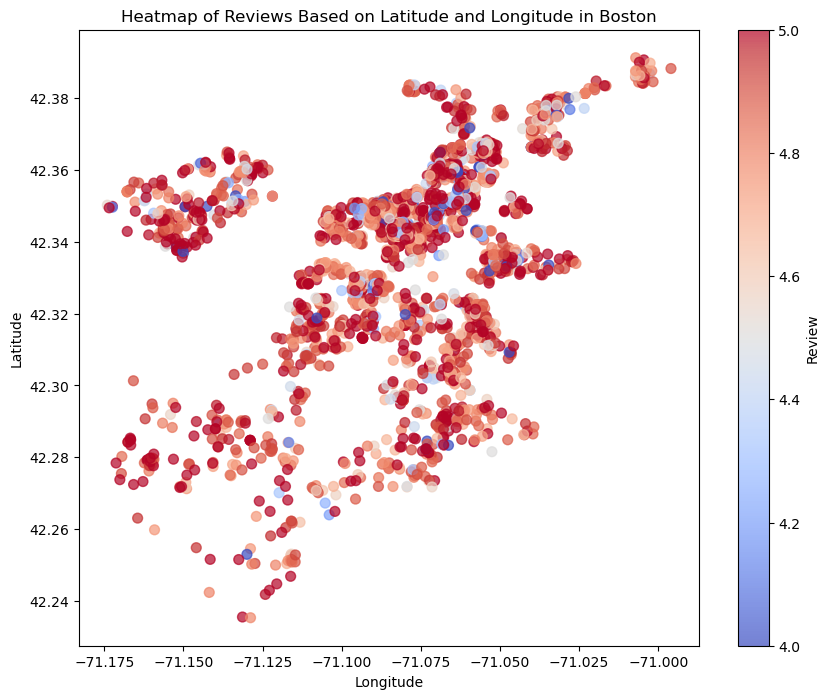

In [106]:
plt.figure(figsize=(10, 8))

scatter = plt.scatter(
    x=filter_review_score['longitude'], 
    y=filter_review_score['latitude'], 
    c=filter_review_score['review_scores_rating'],
    cmap='coolwarm',
    s=50,
    alpha=0.7
)

plt.colorbar(scatter, label='Review')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Heatmap of Reviews Based on Latitude and Longitude in {city.capitalize()}')

plt.show()

#### We grouped the listings based on the neighbourhood group and calculated the average rating for each of the neighbourhoods

In [108]:
grouped_neighbourhoods_reviews = listings.groupby('neighbourhood_group_cleansed', as_index=False)['review_scores_rating'].mean()
grouped_neighbourhoods_reviews

,neighbourhood_group_cleansed,review_scores_rating


In [124]:
def categorize_review(rating):
    if rating > 4.75:
        return 'Top Review'
    elif rating < 3:
        return 'Low Review'
    else:
        return 'Good Review'

price_not_null_listings['review_category'] = price_not_null_listings['review_scores_rating'].apply(categorize_review)

review_counts = price_not_null_listings.groupby('neighbourhood_cleansed')['review_category'].value_counts(normalize=True).unstack(fill_value=0)

review_counts_percentage = review_counts * 100

review_counts_percentage

review_category,Good Review,Low Review,Top Review
neighbourhood_cleansed,,,
Allston,57.500000,1.666667,40.833333
Back Bay,58.805970,0.597015,40.597015
Bay Village,76.923077,0.000000,23.076923
Beacon Hill,53.757225,0.578035,45.664740
Brighton,48.085106,0.425532,51.489362
Charlestown,32.307692,0.000000,67.692308
Chinatown,79.411765,0.000000,20.588235
Dorchester,47.247706,0.688073,52.064220
Downtown,66.565350,1.519757,31.914894


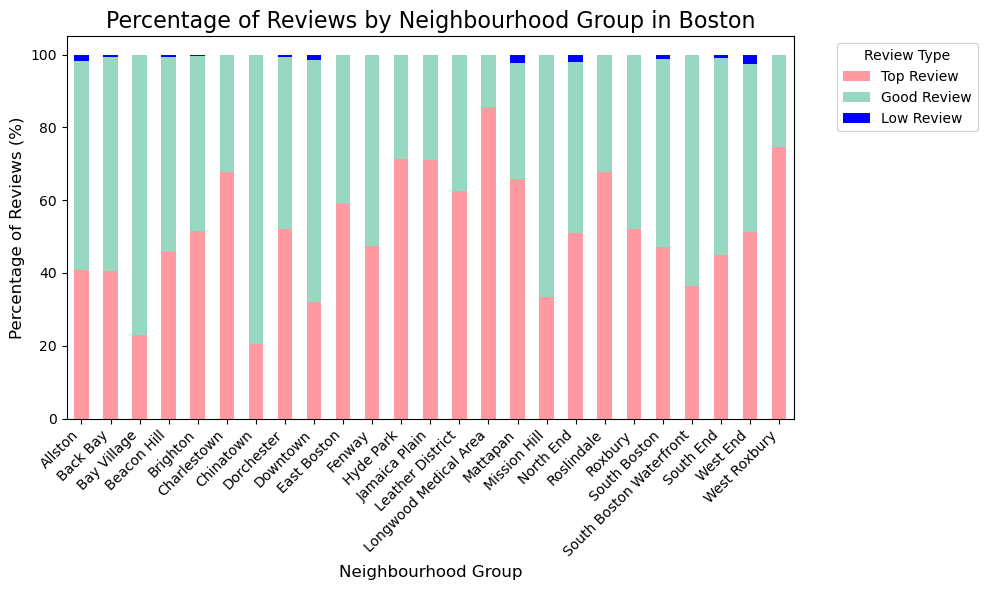

In [125]:
sorted_columns = review_counts_percentage.sort_values(by=review_counts_percentage.index[-1], axis=1, ascending=False).columns

darker_pastel_colors = ['#FF9AA2', '#98D8C1', 'blue']

review_counts_percentage[sorted_columns].plot(kind='bar', stacked=True, figsize=(10, 6), color=darker_pastel_colors)

plt.title(f'Percentage of Reviews by Neighbourhood Group in {city.capitalize()}', fontsize=16)
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('Percentage of Reviews (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Review Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 7. Text Length: Create a new feature that measures the length of each
review (number of words or characters). Determine if the length of a review
correlates with its sentiment or the review score.


In [129]:
city = 'boston'
reviews = pd.read_csv(f'data/{city}/reviews.csv')
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198717 entries, 0 to 198716
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     198717 non-null  int64 
 1   id             198717 non-null  int64 
 2   date           198717 non-null  object
 3   reviewer_id    198717 non-null  int64 
 4   reviewer_name  198716 non-null  object
 5   comments       198658 non-null  object
dtypes: int64(3), object(3)
memory usage: 9.1+ MB


##### preprocessing the comments on the review

In [131]:
# Dropping the null values
reviews = reviews.dropna(subset=['comments'])
reviews['comments'] = reviews['comments'].astype('string')

##### Creating functions for preprocessing the comments (Removing HTML Tags, Special Characters and converting the text to lower so that all text data are standard)

In [133]:
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def count_word(sentence):
     return len(sentence.split(" "))

def get_sentiment(sentence):
    analysis = TextBlob(sentence)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 1
    elif polarity == 0:
        return 0
    else:
        return -1

In [134]:
reviews['cleaned_comments'] = reviews['comments'].apply(preprocess_text)
reviews['number_of_words'] = reviews['cleaned_comments'].apply(count_word)
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments,cleaned_comments,number_of_words
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...,the apartment was as advertised and frank was ...,20
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...,it was a pleasure to stay at franks place the ...,82
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...,the apartment description is entirely faithful...,60
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...,thoroughly enjoyed my time at franks home had ...,66
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...,great value for the money this location has ex...,141
...,...,...,...,...,...,...,...,...
198712,1176861035408746030,1180522031480304705,2024-06-16,165613366,Jorge,"We felt right at home, the check in process wa...",we felt right at home the check in process was...,35
198713,1176861035408746030,1183392743534154687,2024-06-20,130194883,Taylor,"My stay was wonderful! The place was clean, co...",my stay was wonderful the place was clean comf...,48
198714,1177103248225483462,1181189676551419154,2024-06-17,16596596,Reda,Everything was beyond expectations. Thank you,everything was beyond expectations thank you,6
198715,1177619455488589855,1182658809117784938,2024-06-19,55504840,Joann,The unit was perfect. It was exactly what I wa...,the unit was perfect it was exactly what i was...,67


##### Convert the data into chunks so that it is easier to do the do the sentiment analysis using the textblob

In [136]:
def process_chunk(chunk):
    chunk['sentiment'] = chunk['cleaned_comments'].apply(get_sentiment)
    return chunk

chunk_size = 1_00_000
chunks = [reviews[i:i + chunk_size] for i in range(0, reviews.shape[0], chunk_size)]

processed_chunks = []
for chunk in chunks:
    processed_chunk = process_chunk(chunk)
    processed_chunks.append(processed_chunk)

final_reviews = pd.concat(processed_chunks, ignore_index=True)

final_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,cleaned_comments,number_of_words,sentiment
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...,the apartment was as advertised and frank was ...,20,1
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...,it was a pleasure to stay at franks place the ...,82,-1
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...,the apartment description is entirely faithful...,60,1
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...,thoroughly enjoyed my time at franks home had ...,66,1
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...,great value for the money this location has ex...,141,1


##### Total count of positive, negative and neutral reviews

In [138]:
# Netural Review
(final_reviews['sentiment'] == 0).sum()

10096

In [139]:
# Negative Review
(final_reviews['sentiment'] < 0).sum()

2871

In [141]:
# Positive Review
(final_reviews['sentiment'] > 0).sum()

185691

##### Removing all the neutral comments from the dataframe

In [145]:
final_reviews = final_reviews[final_reviews['sentiment'] != 0]

##### Calculating the correaltion between the number of words in the reviews and the associated sentiment

In [147]:
columns_for_correlation = ['number_of_words', 'sentiment']

correlation_matrix = final_reviews[columns_for_correlation].corr()

correlation_matrix

,number_of_words,sentiment
number_of_words,1.000000,-0.061143
sentiment,-0.061143,1.000000


In [148]:
grouped_df = final_reviews.groupby('listing_id', as_index=False)['number_of_words'].sum()
grouped_df

,listing_id,number_of_words
0,3781,1518
1,5506,5777
2,6695,7354
3,8789,1362
4,10811,403
...,...,...
3291,1173899899273728460,20
3292,1175344947100869764,30
3293,1176861035408746030,83
3294,1177619455488589855,67


##### Merging the reviews dataframe and the listing dataframe

In [150]:
merged = pd.merge(
    grouped_df[['number_of_words', 'listing_id']],
    listings[['review_scores_rating', 'id']],
    left_on='listing_id',
    right_on='id',
    how='inner'
)
merged

,number_of_words,listing_id,review_scores_rating,id
0,1518,3781,4.96,3781
1,5777,5506,4.79,5506
2,7354,6695,4.81,6695
3,1362,8789,4.69,8789
4,403,10811,4.33,10811
...,...,...,...,...
3291,20,1173899899273728460,5.00,1173899899273728460
3292,30,1175344947100869764,4.67,1175344947100869764
3293,83,1176861035408746030,5.00,1176861035408746030
3294,67,1177619455488589855,5.00,1177619455488589855


##### Calculating the correlation between the number of words and the review score rating

In [152]:
columns_for_correlation = ['number_of_words', 'review_scores_rating']

correlation_matrix = merged[columns_for_correlation].corr()

correlation_matrix

,number_of_words,review_scores_rating
number_of_words,1.000000,0.107171
review_scores_rating,0.107171,1.000000


In [153]:
final_reviews[final_reviews['sentiment'] > 0]['number_of_words'].mean()

42.10141579290326

In [154]:
final_reviews[final_reviews['sentiment'] < 0]['number_of_words'].mean()

63.89237199582027

#### 8. Keyword Extraction
Identify and count the occurrence of specific keywords (e.g., "clean,"
"comfortable," "noisy") in the reviews. Generate new features based on the
presence of these keywords, which might influence guest satisfaction.

##### Using the `sentiment` field to categorize the word is positive or negative 

In [157]:
positive_reviews = final_reviews[final_reviews['sentiment'] == 1]

In [158]:
negative_reviews = final_reviews[final_reviews['sentiment'] == -1]

In [159]:
def wordcloud(df):
    all_comments = ' '.join(df['cleaned_comments'])

    wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(all_comments)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis
    plt.title('Word Cloud of Reviews')
    plt.show()

##### Generating the word cloud for the positive reviews and negative reviews

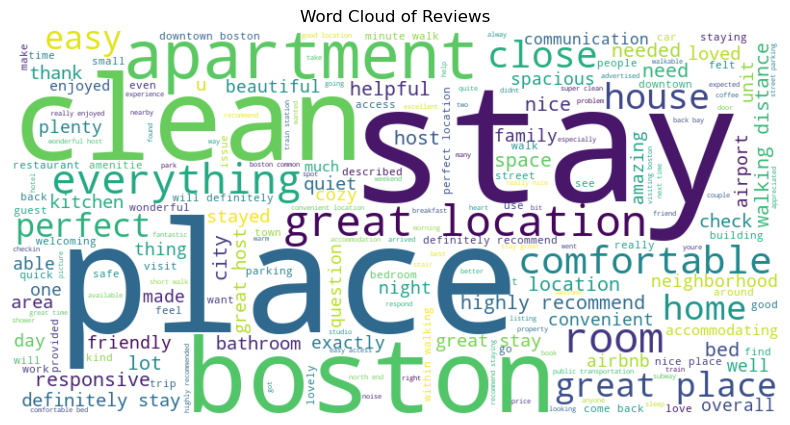

In [161]:
wordcloud(positive_reviews)

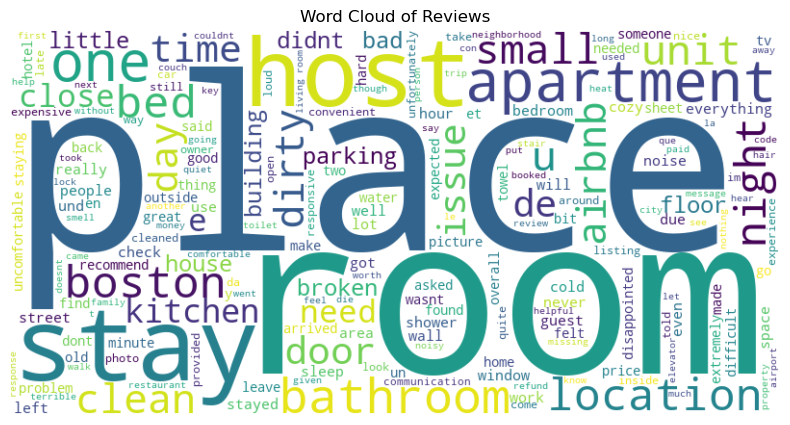

In [162]:
wordcloud(negative_reviews)

In [163]:
positive_words = ['loved', 'spacious', 'great', 'responsive', 'love', 'enjoy', 'perfect', 'clean', 'comfortable', 'recommend', 'kind']
negative_words = ['noise', 'little', 'broken', 'disappointed', 'leave', 'rude', 'unhelpful', 'expensive', 'overpriced', 'outdated', 'cramped']

df = pd.merge(
    final_reviews[['number_of_words', 'listing_id', 'sentiment']],
    listings[['review_scores_rating', 'id', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                'review_scores_communication', 'review_scores_location', 'review_scores_value']],
    left_on='listing_id',
    right_on='id',
    how='inner'
)

df['positive_count'] = final_reviews['cleaned_comments'].apply(lambda x: sum([1 for kw in positive_words if kw in x.lower()]))
df['negative_count'] = final_reviews['cleaned_comments'].apply(lambda x: sum([1 for kw in negative_words if kw in x.lower()]))
df.head()

,number_of_words,listing_id,sentiment,review_scores_rating,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,positive_count,negative_count
0,20,3781,1,4.96,3781,4.96,5.0,4.96,5.0,4.96,4.84,4.88,1.0,0.0
1,82,3781,-1,4.96,3781,4.96,5.0,4.96,5.0,4.96,4.84,4.88,0.0,0.0
2,60,3781,1,4.96,3781,4.96,5.0,4.96,5.0,4.96,4.84,4.88,1.0,0.0
3,66,3781,1,4.96,3781,4.96,5.0,4.96,5.0,4.96,4.84,4.88,3.0,0.0
4,141,3781,1,4.96,3781,4.96,5.0,4.96,5.0,4.96,4.84,4.88,2.0,1.0


In [164]:
correlation_matrix = df.corr()

correlation_matrix

,number_of_words,listing_id,sentiment,review_scores_rating,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,positive_count,negative_count
number_of_words,1.000000,-0.045287,-0.061143,0.018982,-0.045287,0.018982,0.016873,0.001297,0.001941,0.007233,-0.005039,0.030902,-0.000378,0.002763
listing_id,-0.045287,1.000000,-0.022254,-0.051119,1.000000,-0.051119,-0.115738,-0.052052,-0.111704,-0.072436,-0.012635,-0.138156,-0.021484,0.003813
sentiment,-0.061143,-0.022254,1.000000,0.117623,-0.022254,0.117623,0.110707,0.095229,0.091517,0.100333,0.046667,0.112600,-0.000639,-0.003491
review_scores_rating,0.018982,-0.051119,0.117623,1.000000,-0.051119,1.000000,0.893299,0.809617,0.677787,0.751254,0.320274,0.885147,0.007981,-0.003569
id,-0.045287,1.000000,-0.022254,-0.051119,1.000000,-0.051119,-0.115738,-0.052052,-0.111704,-0.072436,-0.012635,-0.138156,-0.021484,0.003813
review_scores_rating,0.018982,-0.051119,0.117623,1.000000,-0.051119,1.000000,0.893299,0.809617,0.677787,0.751254,0.320274,0.885147,0.007981,-0.003569
review_scores_accuracy,0.016873,-0.115738,0.110707,0.893299,-0.115738,0.893299,1.000000,0.783151,0.657146,0.703774,0.309000,0.842636,0.011487,-0.003202
review_scores_cleanliness,0.001297,-0.052052,0.095229,0.809617,-0.052052,0.809617,0.783151,1.000000,0.555406,0.577862,0.286436,0.720587,0.005333,-0.000761
review_scores_checkin,0.001941,-0.111704,0.091517,0.677787,-0.111704,0.677787,0.657146,0.555406,1.000000,0.750126,0.276391,0.637268,0.008659,-0.000122
review_scores_communication,0.007233,-0.072436,0.100333,0.751254,-0.072436,0.751254,0.703774,0.577862,0.750126,1.000000,0.303430,0.692455,0.009805,0.000852


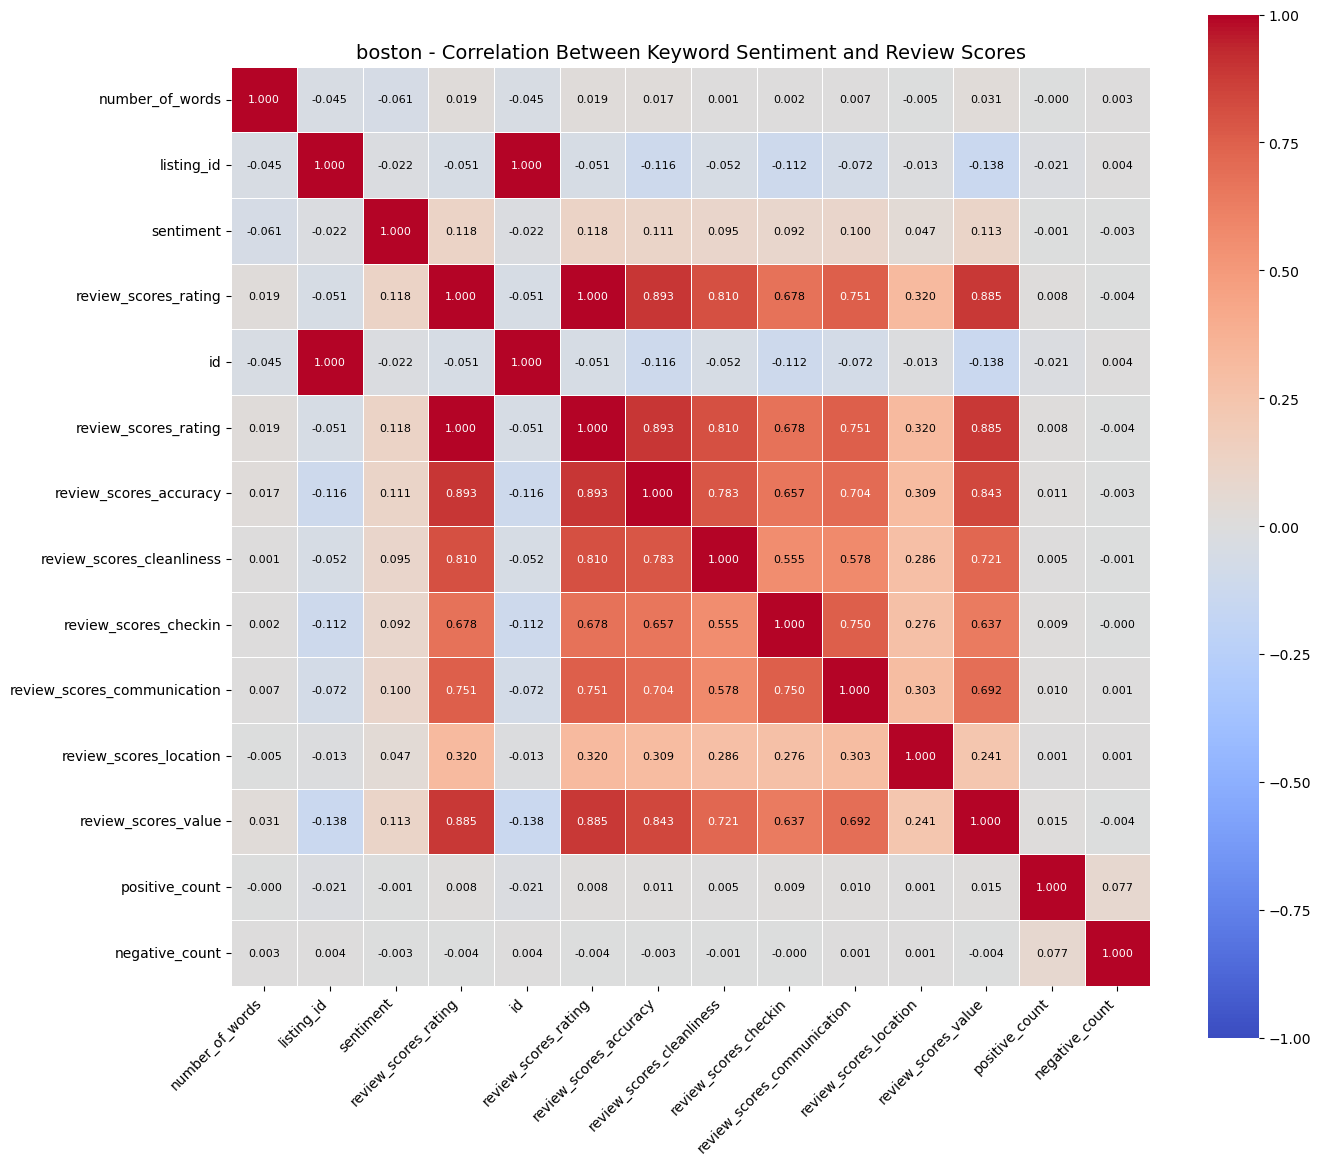

In [188]:
def plot_correlation_heatmap(correlation_matrix, city):
    plt.figure(figsize=(14, 12))
    
    ax = sns.heatmap(correlation_matrix, 
                     cmap='coolwarm', 
                     vmin=-1, vmax=1,
                     square=True,
                     linewidths=0.5)

    for i in range(len(correlation_matrix.columns)):
        for j in range(len(correlation_matrix.columns)):
            text = f"{correlation_matrix.iloc[i, j]:.3f}"
            ax.text(j + 0.5, i + 0.5, text,
                    ha="center", va="center", 
                    color="black" if abs(correlation_matrix.iloc[i, j]) < 0.7 else "white",
                    fontsize=8)

    plt.title(f"{city} - Correlation Between Keyword Sentiment and Review Scores", fontsize=14)
    
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    plt.show()

plot_correlation_heatmap(correlation_matrix, city)